# Assignment 5: FX Carry Strategy

# 1. Introduction:

Carry trade is a strategy which involves borrowing in a low-interest rate and investing in an asset that have higher returns. This work is about implementing FX Carry strategy where the borrowing currency is GBP and the lending currency is Egyptian Pound, Hungarian Forint, Costa Rican Colon and Romanian Leu.   

## Importing all the libraries and packages for the analysis:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import quandl
import functools
import warnings
import nasdaqdatalink
warnings.filterwarnings('ignore')
#import pandas_datareader.data as web
plt.style.use('seaborn')
from plotnine import ggplot, aes, geom_histogram, labs, theme_minimal, facet_wrap, theme, element_text
from plotnine import geom_line

# 2. Getting the data:

## Getting swap yield curves: 

In [2]:
data = pd.read_csv(r"C:\Users\nihar\Desktop\QTS\Assignment 5 FX Carry Strategy\InferredYieldCurves_2024.tab", sep='\t')

data.head()

,Unnamed: 0,shortname,tenor,date,yield
0,3401,Arab Rep Egypt,10Y,2010-01-04,0.075885
1,3402,Arab Rep Egypt,10Y,2010-01-05,0.074642
2,3403,Arab Rep Egypt,10Y,2010-01-06,0.074318
3,3404,Arab Rep Egypt,10Y,2010-01-07,0.073642
4,3405,Arab Rep Egypt,10Y,2010-01-08,0.073024


In [3]:
data['tenor'].value_counts()

tenor
5Y     83085
1Y     81571
10Y    81510
6M     78528
Name: count, dtype: int64

In [4]:
data.shape

(324694, 5)

In [5]:
unique_shortname_counts = data['shortname'].value_counts()
print(unique_shortname_counts)


shortname
Rep Peru                 14700
Rep Colombia             14700
Federative Rep Brazil    14700
Rep Panama               14700
Utd Mexican Sts          14699
Rep South Africa         14698
Arab Rep Egypt           14694
Rep Guatemala            14692
Socialist Rep Vietnam    14690
Rep Kazakhstan           14690
Kdom Thailand            14689
Rep Poland               14688
Rep Turkey               14684
Rep Costa Rica           14432
Rep of Iraq              14402
Romania                  14364
Rep El Salvador          14183
Rep of Serbia            14162
Islamic Rep Pakistan     13547
Hungary                  12617
Rep of Ghana             12587
Rep Trinidad & Tobago    12120
Rep of Angola            11256
Name: count, dtype: int64


### Swap yield curve data for Egypt:

In [6]:
egypt_swap = data[(data['shortname'] == 'Arab Rep Egypt')]

egypt_swap.head()

,Unnamed: 0,shortname,tenor,date,yield
0,3401,Arab Rep Egypt,10Y,2010-01-04,0.075885
1,3402,Arab Rep Egypt,10Y,2010-01-05,0.074642
2,3403,Arab Rep Egypt,10Y,2010-01-06,0.074318
3,3404,Arab Rep Egypt,10Y,2010-01-07,0.073642
4,3405,Arab Rep Egypt,10Y,2010-01-08,0.073024


In [7]:
egypt_swap['date'] = pd.to_datetime(egypt_swap['date'])

egypt_swap = egypt_swap.pivot(index='date', columns='tenor', values='yield')

In [8]:
egypt_swap

tenor,10Y,1Y,5Y,6M
date,,,,
2010-01-04,0.075885,0.028901,0.061109,0.023642
2010-01-05,0.074642,0.027466,0.059096,0.023556
2010-01-06,0.074318,0.027161,0.058905,0.024841
2010-01-07,0.073642,0.026656,0.058715,0.025263
2010-01-08,0.073024,0.026583,0.057959,0.024984
...,...,...,...,...
2024-01-29,0.192608,0.174729,0.215379,0.137792
2024-01-30,0.184911,0.167042,0.206339,0.138899
2024-01-31,0.177383,0.156395,0.196064,0.117218


### Swap yield curve data for Hungary:

In [9]:
hun_swap = data[(data['shortname'] == 'Hungary')]

hun_swap.head()

,Unnamed: 0,shortname,tenor,date,yield
29394,49168,Hungary,10Y,2012-01-02,NaN
29395,49169,Hungary,10Y,2012-01-03,0.105270
29396,49170,Hungary,10Y,2012-01-04,0.113684
29397,49171,Hungary,10Y,2012-01-05,0.116576
29398,49172,Hungary,10Y,2012-01-06,0.109268


In [10]:
hun_swap['date'] = pd.to_datetime(hun_swap['date'])

hun_swap = hun_swap.pivot(index='date', columns='tenor', values='yield')

In [11]:
hun_swap

tenor,10Y,1Y,5Y,6M
date,,,,
2012-01-02,NaN,NaN,NaN,NaN
2012-01-03,0.105270,0.073373,0.094674,0.063824
2012-01-04,0.113684,0.086901,0.104110,0.078224
2012-01-05,0.116576,0.088718,0.106980,0.080665
2012-01-06,0.109268,0.084647,0.100772,0.077275
...,...,...,...,...
2024-01-29,0.063216,0.054115,0.057718,0.056392
2024-01-30,0.062795,0.054499,0.057986,0.056381
2024-01-31,0.062005,0.053805,0.057087,0.056285


### Swap yield curve data for Costa Rica:

In [12]:
cos_swap = data[(data['shortname'] == 'Rep Costa Rica')]

cos_swap.head()

,Unnamed: 0,shortname,tenor,date,yield
84947,2377,Rep Costa Rica,10Y,2010-01-04,0.060319
84948,2378,Rep Costa Rica,10Y,2010-01-05,0.060947
84949,2379,Rep Costa Rica,10Y,2010-01-06,0.059599
84950,2380,Rep Costa Rica,10Y,2010-01-07,0.058956
84951,2381,Rep Costa Rica,10Y,2010-01-08,0.058759


In [13]:
cos_swap['date'] = pd.to_datetime(cos_swap['date'])

cos_swap = cos_swap.pivot(index='date', columns='tenor', values='yield')

In [14]:
cos_swap

tenor,10Y,1Y,5Y,6M
date,,,,
2010-01-04,0.060319,0.012753,0.045461,0.011485
2010-01-05,0.060947,0.012151,0.044628,0.007155
2010-01-06,0.059599,0.011969,0.044834,0.006760
2010-01-07,0.058956,0.011799,0.044247,0.006860
2010-01-08,0.058759,0.015362,0.043650,0.006565
...,...,...,...,...
2024-01-29,0.098327,0.103751,0.096680,0.107974
2024-01-30,0.098144,0.104135,0.096955,0.107959
2024-01-31,0.097467,0.103429,0.096064,0.107851


### Swap yield curve data for Romania:

In [15]:
rom_swap = data[(data['shortname'] == 'Romania')]

rom_swap.head()

,Unnamed: 0,shortname,tenor,date,yield
280941,13256,Romania,10Y,2010-01-04,0.077191
280942,13257,Romania,10Y,2010-01-05,0.071823
280943,13258,Romania,10Y,2010-01-06,0.072606
280944,13259,Romania,10Y,2010-01-07,0.071390
280945,13260,Romania,10Y,2010-01-08,0.070532


In [16]:
rom_swap['date'] = pd.to_datetime(rom_swap['date'])

rom_swap = rom_swap.pivot(index='date', columns='tenor', values='yield')

In [17]:
rom_swap

tenor,10Y,1Y,5Y,6M
date,,,,
2010-01-04,0.077191,0.037587,0.064773,0.033161
2010-01-05,0.071823,0.032862,0.059161,0.029320
2010-01-06,0.072606,0.029377,0.059474,0.023663
2010-01-07,0.071390,0.026526,0.058454,0.022248
2010-01-08,0.070532,0.026391,0.057286,0.022016
...,...,...,...,...
2024-01-29,0.068503,0.054566,0.060311,0.058924
2024-01-30,0.068303,0.055047,0.060601,0.059008
2024-01-31,0.067593,0.054417,0.059677,0.058983


### Plotting the swap yield curves

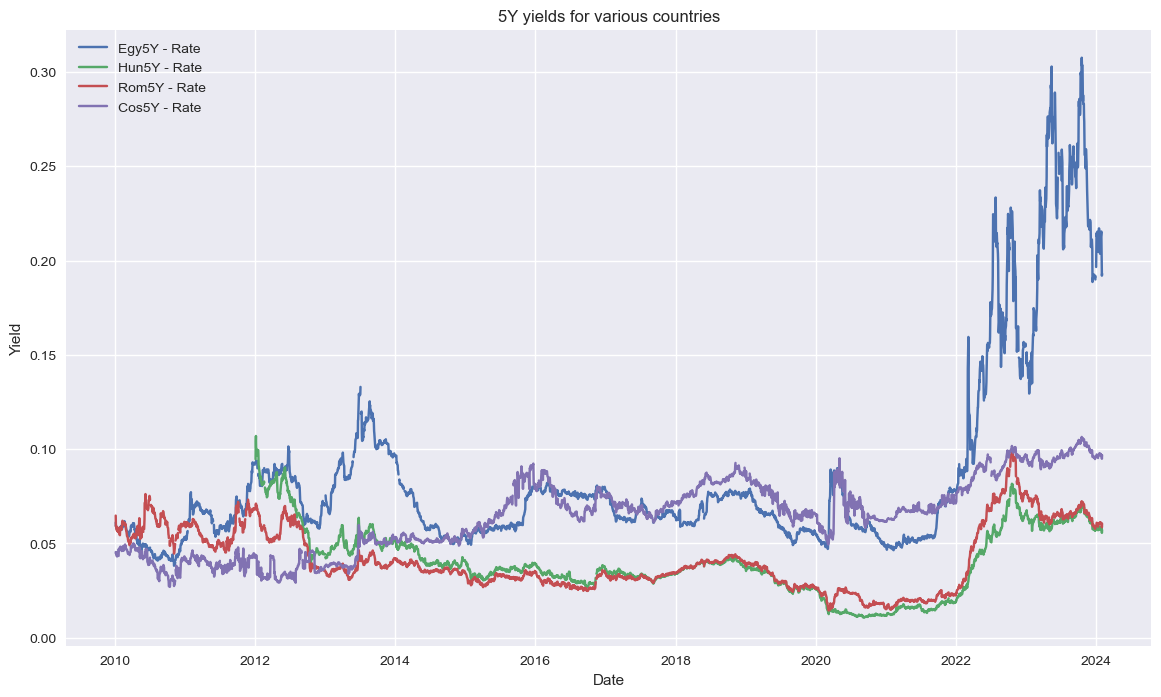

In [18]:
countries_tenor_data = {
    'Egypt': egypt_swap,
    'Hungary': hun_swap,
    'Romania': rom_swap,
    'Costa Rica': cos_swap
}

# Plotting the yield curves for the filtered data
plt.figure(figsize=(14, 8))

for country, df in countries_tenor_data.items():
    plt.plot( df['5Y'], label=f'{country[:3]}5Y - Rate')
    
plt.title('5Y yields for various countries')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

# UK OIS:

In [19]:
ois_spot_16_24 = pd.read_excel(r"C:\Users\nihar\Desktop\QTS\Assignment 5 FX Carry Strategy\OIS daily data_2016 to present.xlsx", sheet_name='3. spot, short end')

ois_spot_16_24.head()


,Unnamed: 0,UK OIS spot curve,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Maturity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,months:,1.000000,2.000000,3.00,4.000000,5.000000,6.0,7.000000,8.000000,9.00,...,51.00,52.000000,53.000000,54.0,55.000000,56.000000,57.00,58.000000,59.000000,60.0
2,years:,0.083333,0.166667,0.25,0.333333,0.416667,0.5,0.583333,0.666667,0.75,...,4.25,4.333333,4.416667,4.5,4.583333,4.666667,4.75,4.833333,4.916667,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df1 = ois_spot_16_24.iloc[4:, [0, 6, 12, 60]]  # Selecting rows from 5th row (index 4) and specific columns
df1.columns = ['Date', '0.5Y', '1Y', '5Y']  # Renaming columns

# Converting 'Date' column to datetime and setting it as the index
df1['Date'] = pd.to_datetime(df1['Date'])
df1.set_index('Date', inplace=True)

# Displaying the first few rows of the new dataframe
df1.head()

,0.5Y,1Y,5Y
Date,,,
2016-01-01,NaN,NaN,NaN
2016-01-04,0.485055,0.559152,1.182037
2016-01-05,0.481630,0.542545,1.156425
2016-01-06,0.475291,0.525816,1.094760
2016-01-07,0.474208,0.514902,1.062710


In [21]:
ois_spot_9_15 = pd.read_excel(r"C:\Users\nihar\Desktop\QTS\Assignment 5 FX Carry Strategy\OIS daily data_2009 to 2015.xlsx", sheet_name='2. spot curve')

ois_spot_9_15.head()


,Unnamed: 0,UK OIS spot curve,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Maturity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,months:,1.000000,2.000000,3.00,4.000000,5.000000,6.0,7.000000,8.000000,9.00,...,51.00,52.000000,53.000000,54.0,55.000000,56.000000,57.00,58.000000,59.000000,60.0
2,years:,0.083333,0.166667,0.25,0.333333,0.416667,0.5,0.583333,0.666667,0.75,...,4.25,4.333333,4.416667,4.5,4.583333,4.666667,4.75,4.833333,4.916667,5.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df2 = ois_spot_9_15.iloc[4:, [0, 6, 12, 60]]  # Selecting rows from 5th row (index 4) and specific columns
df2.columns = ['Date', '0.5Y', '1Y', '5Y']  # Renaming columns

# Converting 'Date' column to datetime and setting it as the index
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

df2 = df2[df2.index >= pd.to_datetime("2010-01-04")]

# Displaying the first few rows of the new dataframe
df2.head()

,0.5Y,1Y,5Y
Date,,,
2010-01-04,0.479320,0.737957,2.956270
2010-01-05,0.481950,0.722412,2.937853
2010-01-06,0.481144,0.729072,2.959169
2010-01-07,0.473074,0.714314,2.944956
2010-01-08,0.466473,0.688622,2.929327


In [23]:
ois = pd.concat([df2, df1])

# Sorting the merged dataframe by date
ois.sort_index(inplace=True)

# Display the merged dataframe
ois.head()

,0.5Y,1Y,5Y
Date,,,
2010-01-04,0.479320,0.737957,2.956270
2010-01-05,0.481950,0.722412,2.937853
2010-01-06,0.481144,0.729072,2.959169
2010-01-07,0.473074,0.714314,2.944956
2010-01-08,0.466473,0.688622,2.929327


#### Plotting UK OIS for all years:

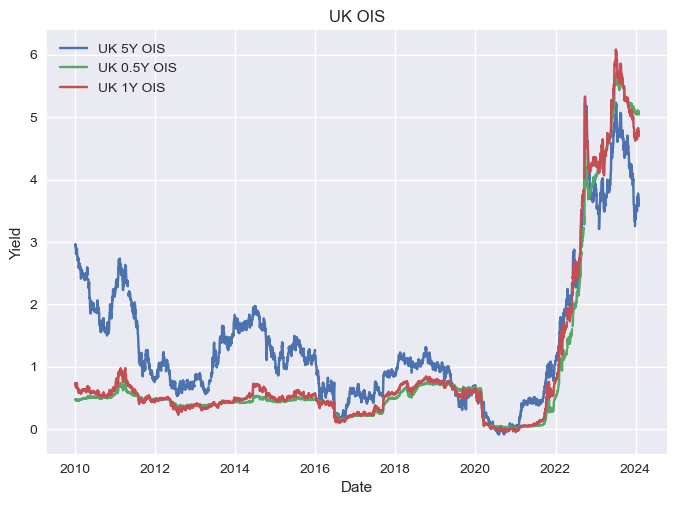

In [24]:
plt.plot( ois['5Y'], label='UK 5Y OIS')
plt.plot( ois['0.5Y'], label='UK 0.5Y OIS')
plt.plot( ois['1Y'], label='UK 1Y OIS')


plt.title('UK OIS')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
ois.isna().sum()

0.5Y    117
1Y      117
5Y      117
dtype: int64

### Using NASDAQ Data Link Api to fetch the FX Rates

In [26]:
@functools.lru_cache(maxsize=16)
def fetch_fx(country,sdate,edate):
    nasdaqdatalink.ApiConfig.api_key = '9v9zUkZARMYqBCzFPXzZ'
    qdata = nasdaqdatalink.get_table('EDI/CUR',code=country, date = { 'gte': sdate, 'lte': edate})
    return qdata

In [27]:
gbp_usd = fetch_fx('GBP', '2010-01-04', '2024-02-02')
gbp_usd['date'] = pd.to_datetime(gbp_usd['date'])
gbp_usd.set_index('date', inplace = True)
gbp_usd = gbp_usd.resample('W-WED').last()
gbp_usd.drop('code', axis = 1, inplace = True)

In [28]:
gbp_usd

,rate
date,
2010-01-06,0.625042
2010-01-13,0.614212
2010-01-20,0.614339
2010-01-27,0.617393
2010-02-03,0.627483
...,...
2024-01-10,0.787423
2024-01-17,0.793105
2024-01-24,0.787268


## Function to fetch the FX Rates and swap yield curve data for the lending currency:

In [29]:
def fetch_fx_yc(country):
    
    if country=='EGP':
        sdate,edate="2010-01-04","2024-02-02"
        fx = fetch_fx('EGP', sdate, edate)
        fx = fx.sort_values(by = 'date')
        lend = egypt_swap
        lend = lend.iloc[:,:4].resample('W-WED').last().fillna(method="ffill")
        lend.columns=[10,1,5,6/12]
    if country=='HUF':
        sdate,edate="2012-01-02","2024-02-02"
        fx = fetch_fx('HUF',sdate,edate)
        fx = fx.sort_values(by = 'date')
        lend = hun_swap
        lend = lend.resample('W-WED').last().fillna(method="ffill")
        lend.columns=[10,1,5,6/12]
    if country=='CRC':
        sdate,edate="2010-01-04","2024-02-02"
        fx = fetch_fx('CRC',sdate,edate)
        fx = fx.sort_values(by = 'date')
        lend = cos_swap
        lend = lend.resample('W-WED').last().fillna(method="ffill")
        lend.columns=[10,1,5,6/12]
    if country=='RON':
        sdate,edate="2010-01-04","2024-02-02"
        fx = fetch_fx('RON',sdate,edate)
        fx = fx.sort_values(by = 'date')
        lend = rom_swap
        lend = lend.resample('W-WED').last().fillna(method="ffill")
        lend.columns=[10,1,5,6/12]
    
    fx['date'] = pd.to_datetime(fx['date'])
    fx.set_index('date', inplace = True)
    fx=fx.resample('W-WED').last()
    fx.drop('code', axis = 1, inplace = True)
    fx_gbp_usd = gbp_usd
    fx = fx/fx_gbp_usd
    borrow = ois
    borrow = borrow.resample('W-WED').last().fillna(method="ffill")
    borrow.columns = [6/12,1,5]
    
    return fx, lend, borrow, fx_gbp_usd
        
    

# 3. Functions for various calculations:

### Function to calculate the bond price and zero coupon bonds

In [30]:
def bond_price(zcb, coupon_rate, tenor):
    times = np.arange(tenor, 0, step=-0.5)[::-1]
    if times.shape[0]==0:
        p = 1.0
    else:
        r = np.interp(times, zcb.index.values, zcb.values) # Linear interpolation
        p = np.exp(-tenor*r[-1]) + 0.5 * coupon_rate * np.exp(-r*times).sum()
    return p



In [31]:
def compute_zcb_curve(spot_rates_curve):
    zcb_rates = spot_rates_curve.copy()
    for curve in spot_rates_curve.columns:
        spot = spot_rates_curve[curve]
        for tenor, spot_rate in spot.items():
            if tenor>0.001:
                times = np.arange(tenor-0.5, 0, step=-0.5)[::-1]
                coupon_half_yr = 0.5*spot_rate
                z = np.interp(times, zcb_rates[curve].index.values, zcb_rates[curve].values) # Linear interpolation
                preceding_coupons_val = (coupon_half_yr*np.exp(-z*times)).sum()
                zcb_rates[curve][tenor] = -np.log((1-preceding_coupons_val)/(1+coupon_half_yr))/tenor
    return zcb_rates


### Function to implement carry trade strategy:

1. Setting the initial capital including the borrowed and own capital. Total capital pegged at $10MM.

2. Calculating the zero curve from the swap yield curve data.

3. Running a loop to calculate the bond price for each week.

4. Calculate the amount invested in local currency.

5. Buy the bonds by taking the amount in local currency and the full bond price.

6. Positions are taken only when the 5Y Swap yield curve for lending currency is more than the 5Y swap rate by 50bp.

7. Caculate the amount received in the local currency at the end of the week using the bond bought and 1 week bond price.

8. Calculate the amount received in borrowed currency at the end of the week.

9. Calculate the bond pnl by offsetting the taotal capital from the GBP received at the end of the week.

10. Calculate the borrow interest by first checking whether the bond has been bought, if yes then the interest rate is the negative of the borrowed capital multiplied by OIS + 50 bp.

11. Calculate the pnl as the sum of bond pnl and borrow interest.

12. Calculate the return by dividing PnL with the own capital.

13. Caculate the return Sharpe and Sortino ratios.

14. Calculate the breakdown of the PnL into Bond Pnl and forex Pnl when the forex rates are not changing.

In [32]:
def carry_trade(currency):
    
    # Getting the currency data and yield curve data
    fx, lend, borrow, fx_gbp_usd = fetch_fx_yc(currency)
    
    """
    fx: Forex rate of the local currency (already converted to GBP)
    lend: Swap yield curve for the local currency
    borrow: UK Overnight Index Swaps
    fx_gbp_usd: Forex Rates for GBP to USD
    
    """
    df = borrow[[]]
    df["full_bond_price"] = 0.0
    df["1w_bond_price"] = 0.0 
    
    # Capital in GBP
    df['own_cap_gbp'] = (2.0 * np.power(10, 6)) * fx_gbp_usd
    df['borrowed_cap_gbp'] = (8.0 * np.power(10, 6)) * fx_gbp_usd
    df['tot_cap_gbp'] = df['borrowed_cap_gbp'] + df['own_cap_gbp'] #Maintain $10MM capital every week
    
    #Calculate the zero curve
    zero_curve = compute_zcb_curve(lend.T)   
    
    #Calculate the bond prices
    for i in range(len(zero_curve.T) - 1):
        zcb_rates = zero_curve.iloc[:, i]
        df.iat[i, 0] = bond_price(zcb_rates, lend.iloc[i, 2], 5.)
        
        if i + 1 < len(df):
            zcb_rates_next = zero_curve.iloc[:, i + 1]
            df.iat[i + 1, 1] = bond_price(zcb_rates_next, lend.iloc[i, 2], 5. - 1/52)
        
    df['borrow_5y'] = borrow[5]       
    df['lend_5y'] = lend[5]
    df['fx'] = fx
    
    # PnL calculation in GBP
    df['local_currency_gbp'] = df['tot_cap_gbp'] * df['fx']
    df['bond_bought'] = (df['local_currency_gbp'] / df["full_bond_price"]).fillna(0.)
    df['bond_bought'][-1] = 0.
    df['bond_bought'] = np.where(df['lend_5y'] - df['borrow_5y'] > 0.005, df['bond_bought'], 0.)
    df['local_recv_1w'] = ((df['bond_bought'].shift(1) * df['1w_bond_price'])).fillna(0.)
    df['GBP_recv'] = df['local_recv_1w'] / df['fx']
    df['Bond_Pnl_GBP'] = df['GBP_recv'] - np.where(df['bond_bought'].shift(1) > 0., df['tot_cap_gbp'], 0.)
    df['Bond_Pnl_GBP'][0] = 0.
    df['borrow_interest_gbp'] = -1 * np.where(df['bond_bought'].shift(1) > 0., df['borrowed_cap_gbp'], 0.)\
                                * ((df['borrow_5y'].shift(1).fillna(0) + 0.005) / 52)
    df['borrow_interest_gbp'][0] = 0.
    df['Pnl_GBP'] = df['Bond_Pnl_GBP'] + df['borrow_interest_gbp']
    
    # Return Calculation
    df['Return_GBP'] = df['Pnl_GBP'] / df['own_cap_gbp']
    df['Return_cum_GBP'] = df['Return_GBP'].cumsum()
    
    # Sharpe and Sortino ratio
    df['running_sharpe_GBP'] = df['Return_GBP'].rolling(52).mean() / df['Return_GBP'].rolling(52).std()
    df['running_sortino_GBP'] = df['Return_GBP'].rolling(52).mean() / df['Return_GBP'].rolling(52)\
                            .apply(lambda x: np.std([i for i in x if i < 0], ddof=1))
    
    # Columns to calculate the breakdown of PnL
    df['fx_held_const'] = df['fx'].shift(1).fillna(0)
    df['GBP_recv_no_fx_change'] = df['local_recv_1w'] / df['fx_held_const']
    df['Bond_Pnl_no_fx_change_gbp'] = df['GBP_recv_no_fx_change'] - np.where(df['bond_bought'].shift(1) > 0., df['tot_cap_gbp'], 0.)
    df['Bond_Pnl_no_fx_change_gbp'][0] = 0.
    df['fx_pnl_gbp'] = df['Bond_Pnl_GBP'] - df['Bond_Pnl_no_fx_change_gbp']
    
    plot_metrics(df, currency)
    
    return df


## Function to plot the return metrics:

In [33]:
def plot_metrics(df, currency):
    # Convert the DataFrame for plotting
    df_plot = df.copy()
    # Create histogram plot
    hist_plot = (ggplot(df, aes(x='Return_GBP')) +
                 geom_histogram(bins=20, fill='blue', color='black') +
                 labs(title='Distribution of weekly returns',
                      x='Weekly Return',
                      y='Count') +
                 theme_minimal() +
                 theme(axis_title=element_text(size=12),
                       plot_title=element_text(size=14, face='bold')))

    # Create time series plot
    time_series_plot = (ggplot(df, aes(x=df.index, y='Return_GBP')) +
                        geom_line(color='blue') +
                        labs(title='Weekly return for Carry Trade {}/GBP pair'.format(currency),
                             x='Time',
                             y='Weekly Return') +
                        theme_minimal() +
                        theme(axis_title=element_text(size=12),
                              plot_title=element_text(size=14, face='bold'),
                             axis_text_x=element_text(rotation=45, hjust=1)))

    print(time_series_plot)
    print(hist_plot)
    
    print("\n")
    print("Return description :")
    print(df['Return_GBP'].describe())
    print("Return Kurtosis is :%.2f"%df['Return_GBP'].kurtosis())
    
    # Profit Breakdown Plot
    plt.figure(figsize=(15, 8))
    plt.plot(df_plot.index, df_plot['Pnl_GBP'].cumsum() / np.power(10, 6), label="Cumulative GBP Pnl")
    plt.plot(df_plot.index, df_plot['fx_pnl_gbp'].cumsum() / np.power(10, 6), label="FX PNL (GBP)", linestyle="--")
    plt.plot(df_plot.index, df_plot['Bond_Pnl_no_fx_change_gbp'].cumsum() / np.power(10, 6), label="Bond Pnl (GBP)", linestyle="--")
    plt.plot(df_plot.index, df_plot['borrow_interest_gbp'].cumsum() / np.power(10, 6), label="Interest (GBP)", linestyle="--")
    plt.title(f"Breakdown of Cumulative £{df_plot['Pnl_GBP'].cumsum()[-1] / pow(10, 6):.2f} M Pnl")
    plt.xlabel("Time")
    plt.ylabel("£ PNL")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    #Currency vs GBP movement 
    plt.figure(figsize=(15,5))
    plt.plot(df.index,df["fx"],label='GBP/%s'%currency)
    plt.title("FX rate movement")
    plt.xlabel("Time")
    plt.ylabel("FX Rate")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Sharpe and Sortino Plot
    plt.figure(figsize=(15, 5))
    plt.title("1Y Running Risk Metrics (GBP)")
    plt.plot(df_plot.index, df_plot['running_sharpe_GBP'], label="1Y Running Sharpe (GBP)")
    plt.plot(df_plot.index, df_plot['running_sortino_GBP'], label="1Y Running Sortino (GBP)")
    plt.xlabel("Time")
    plt.ylabel("Ratios (Sharpe/Sortino)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
       
    #Correlation between pnl and it's components
    print("=========================================================================================================")
    print("Correlation between Weekly Pnl and it's Components")
    print(df[['Pnl_GBP','fx_pnl_gbp','Bond_Pnl_no_fx_change_gbp',"borrow_interest_gbp"]].corr().iloc[0:1,1:3],"\n\n")
    

    

# 4. Performing carry trade:

## GBP-EGP pair:

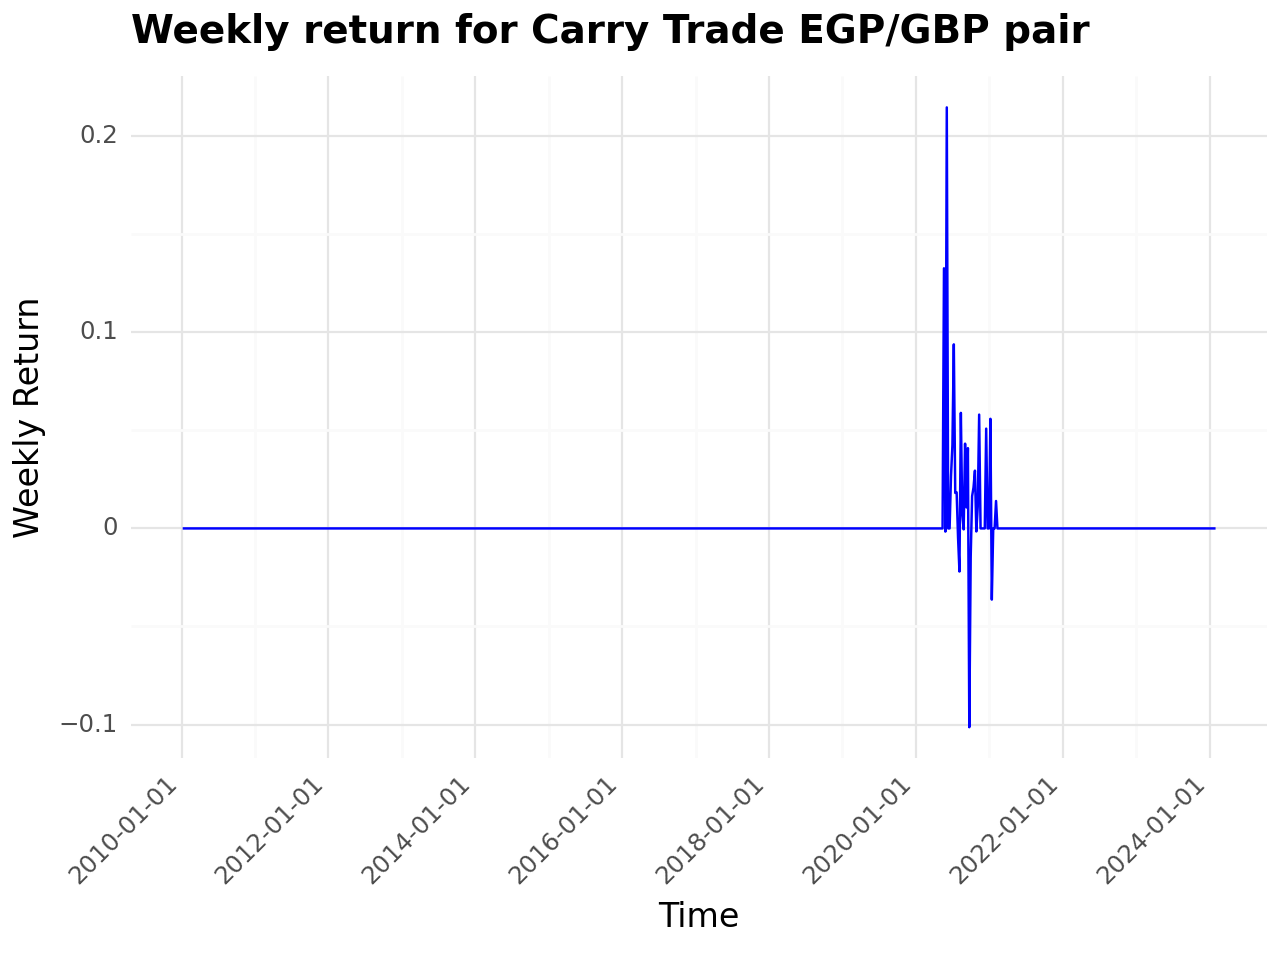

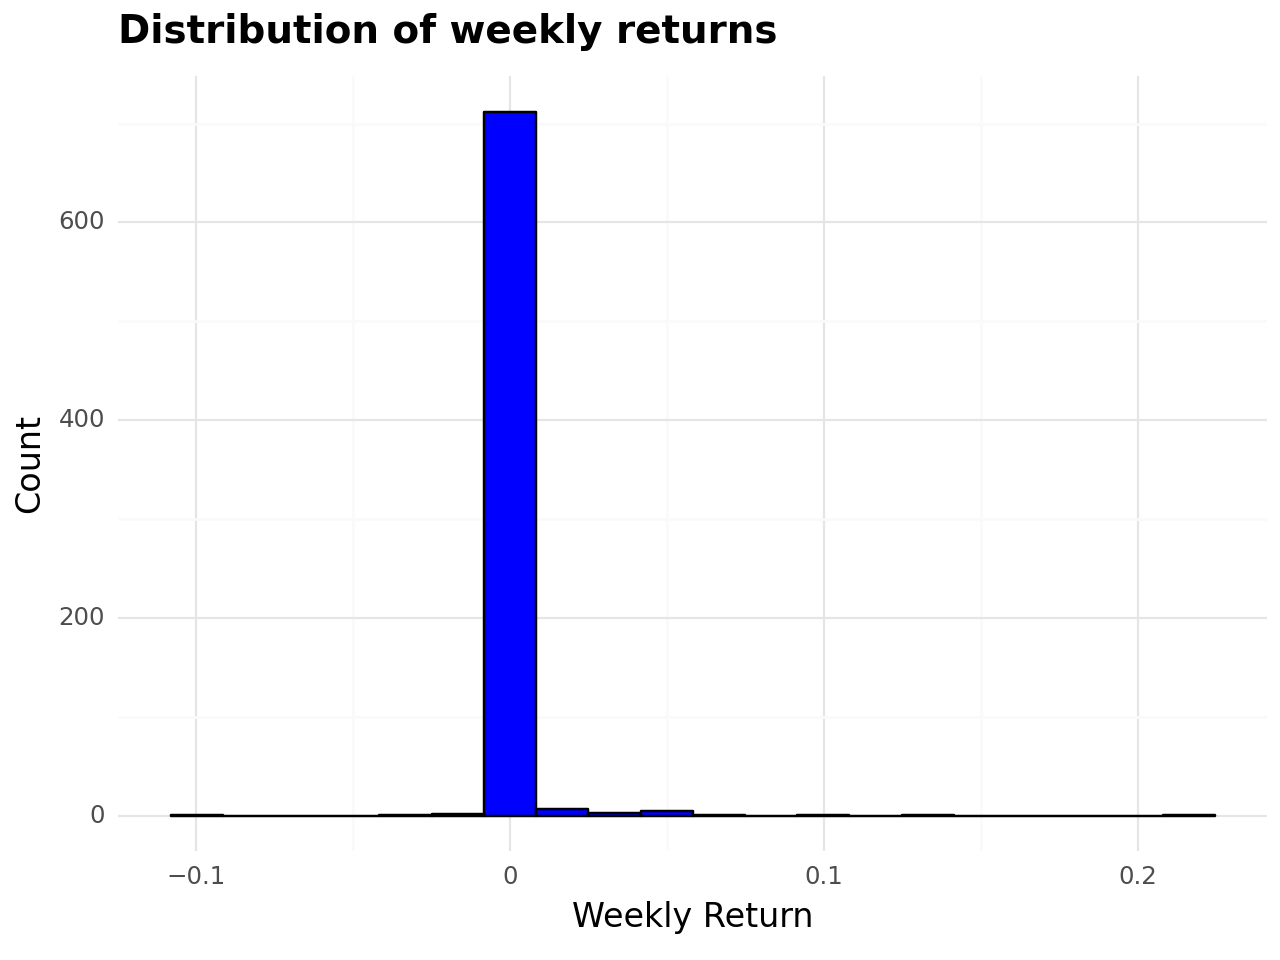




Return description :
count    735.000000
mean       0.001064
std        0.011977
min       -0.101353
25%        0.000000
50%        0.000000
75%        0.000000
max        0.214666
Name: Return_GBP, dtype: float64
Return Kurtosis is :171.51


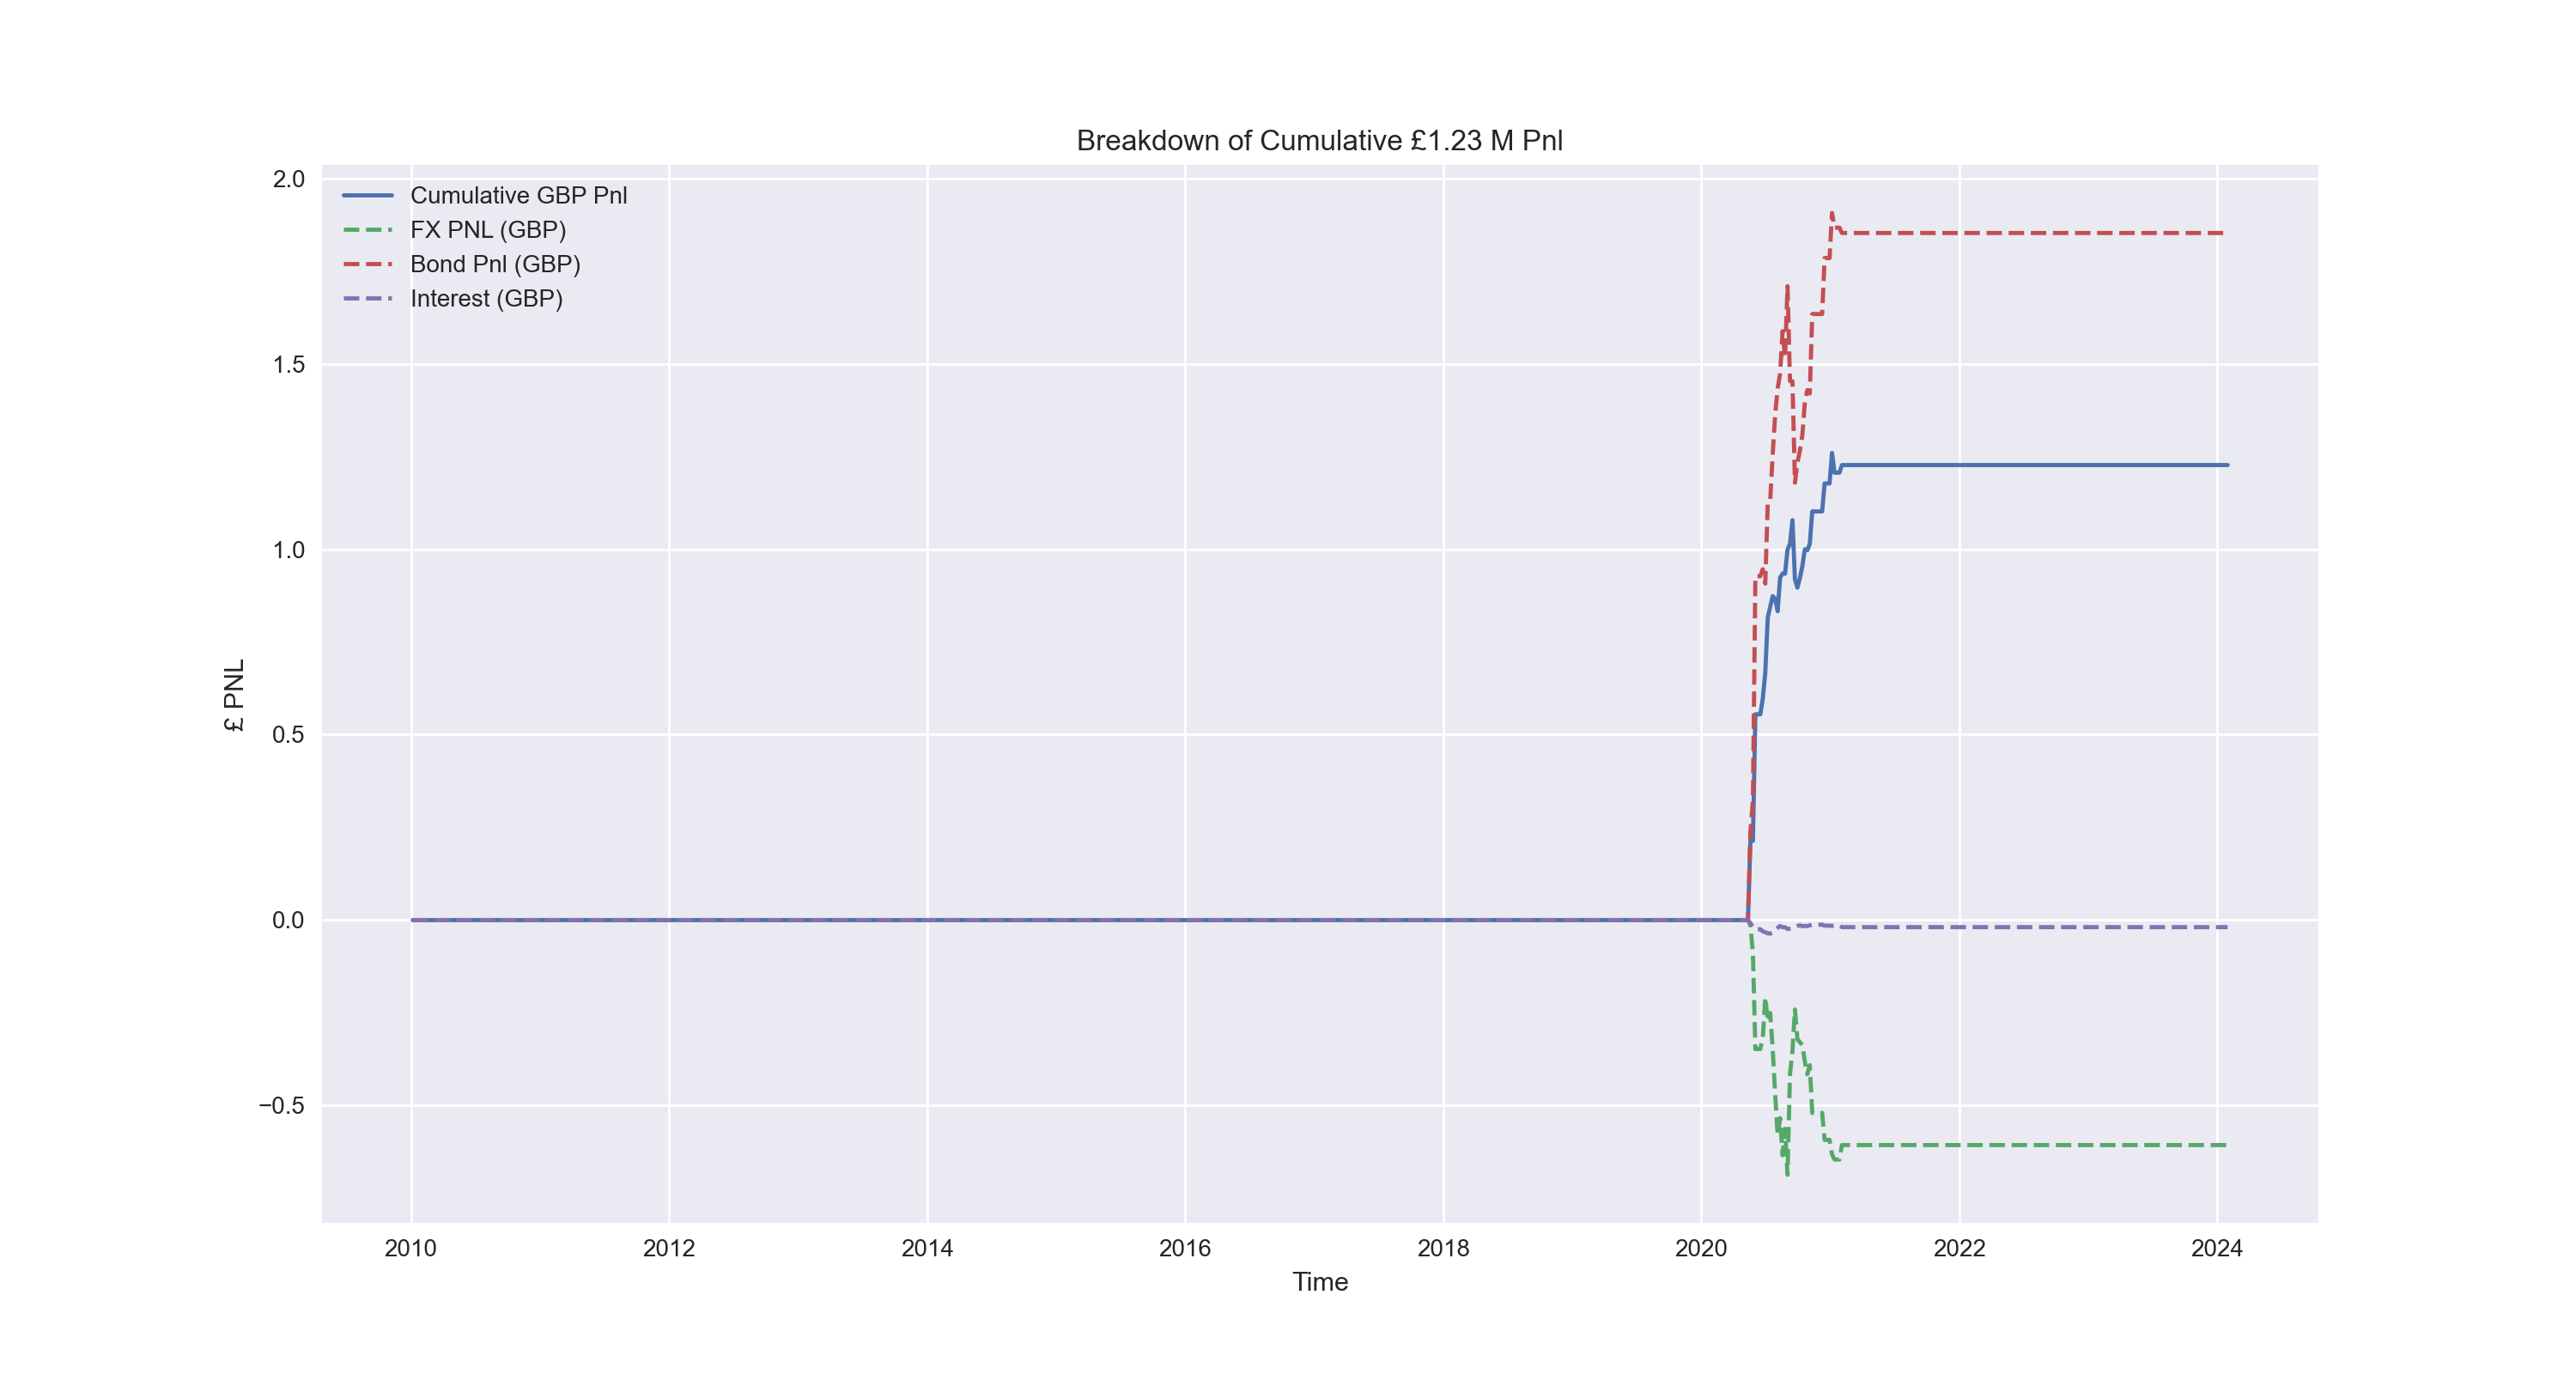

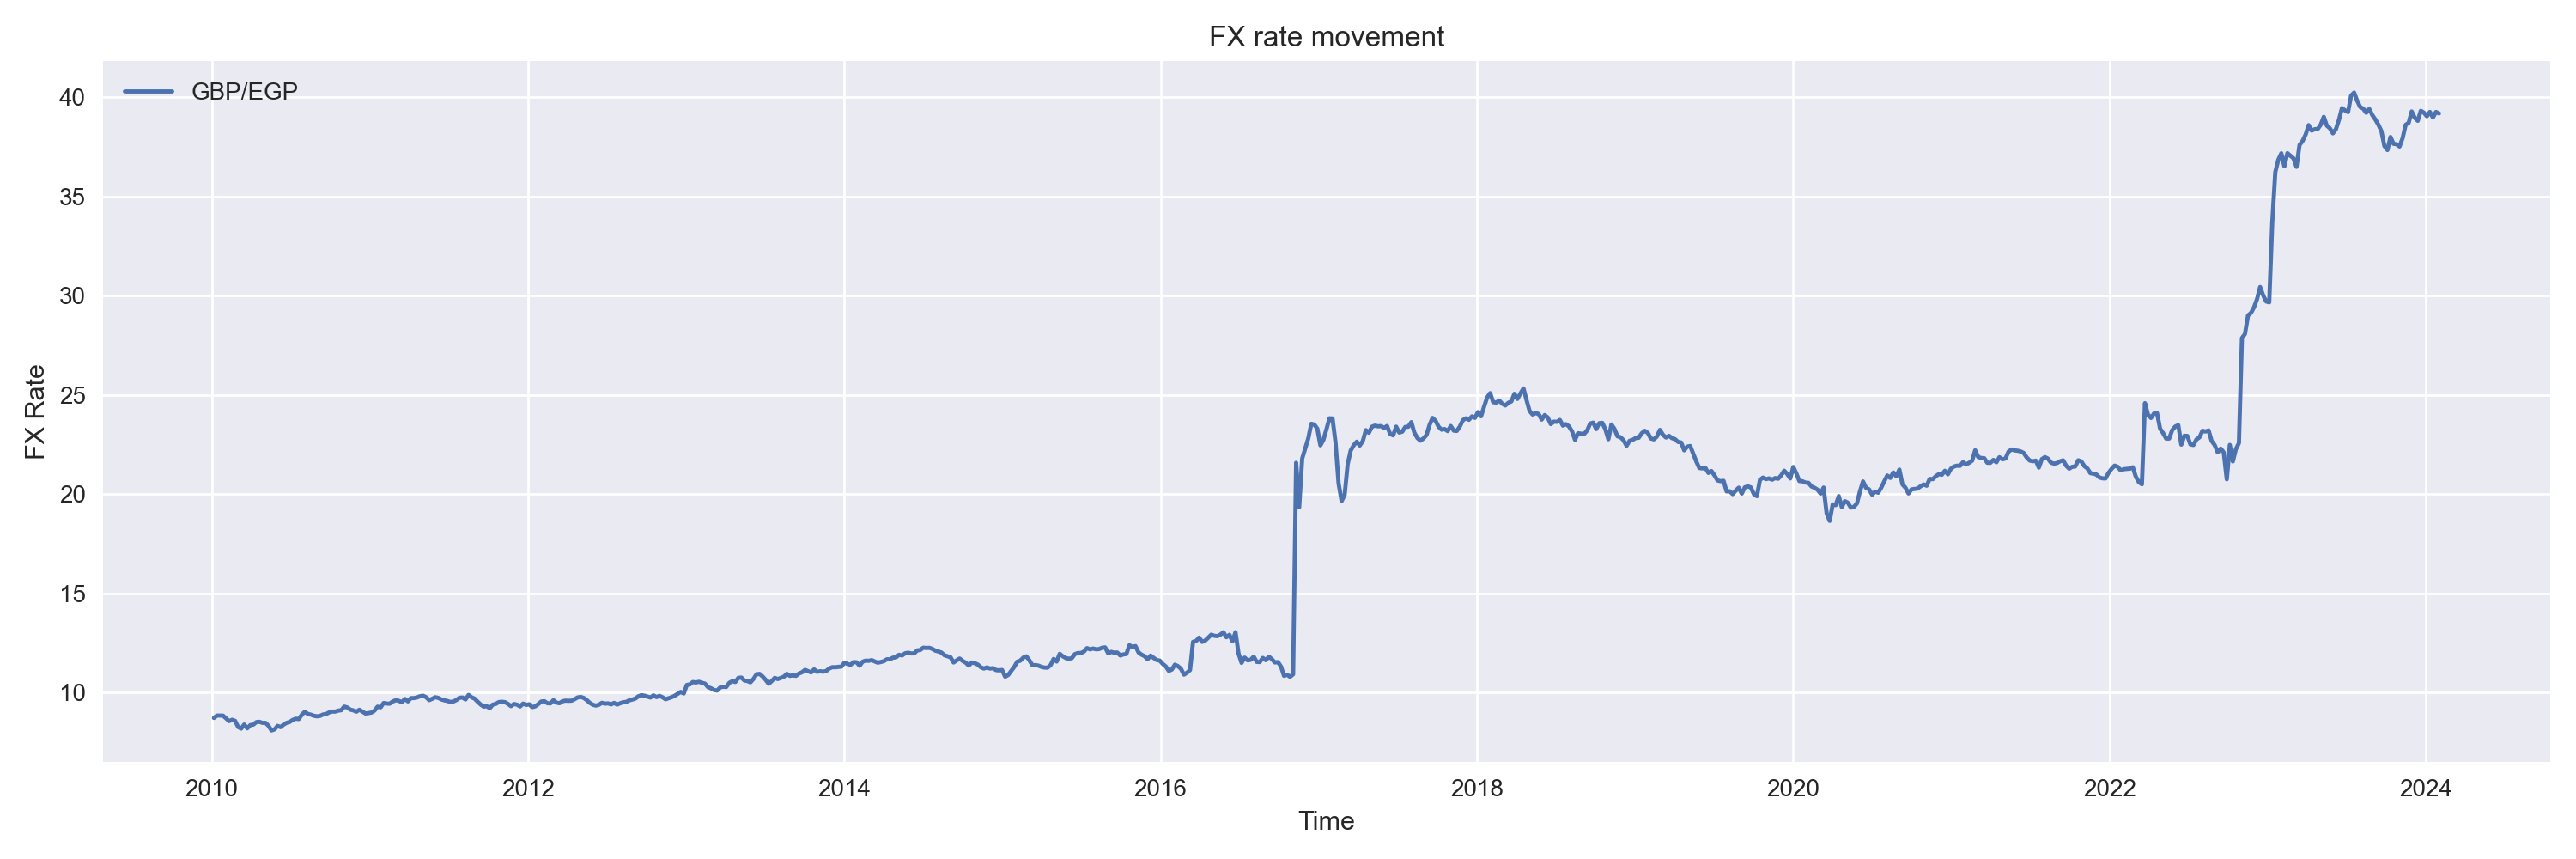

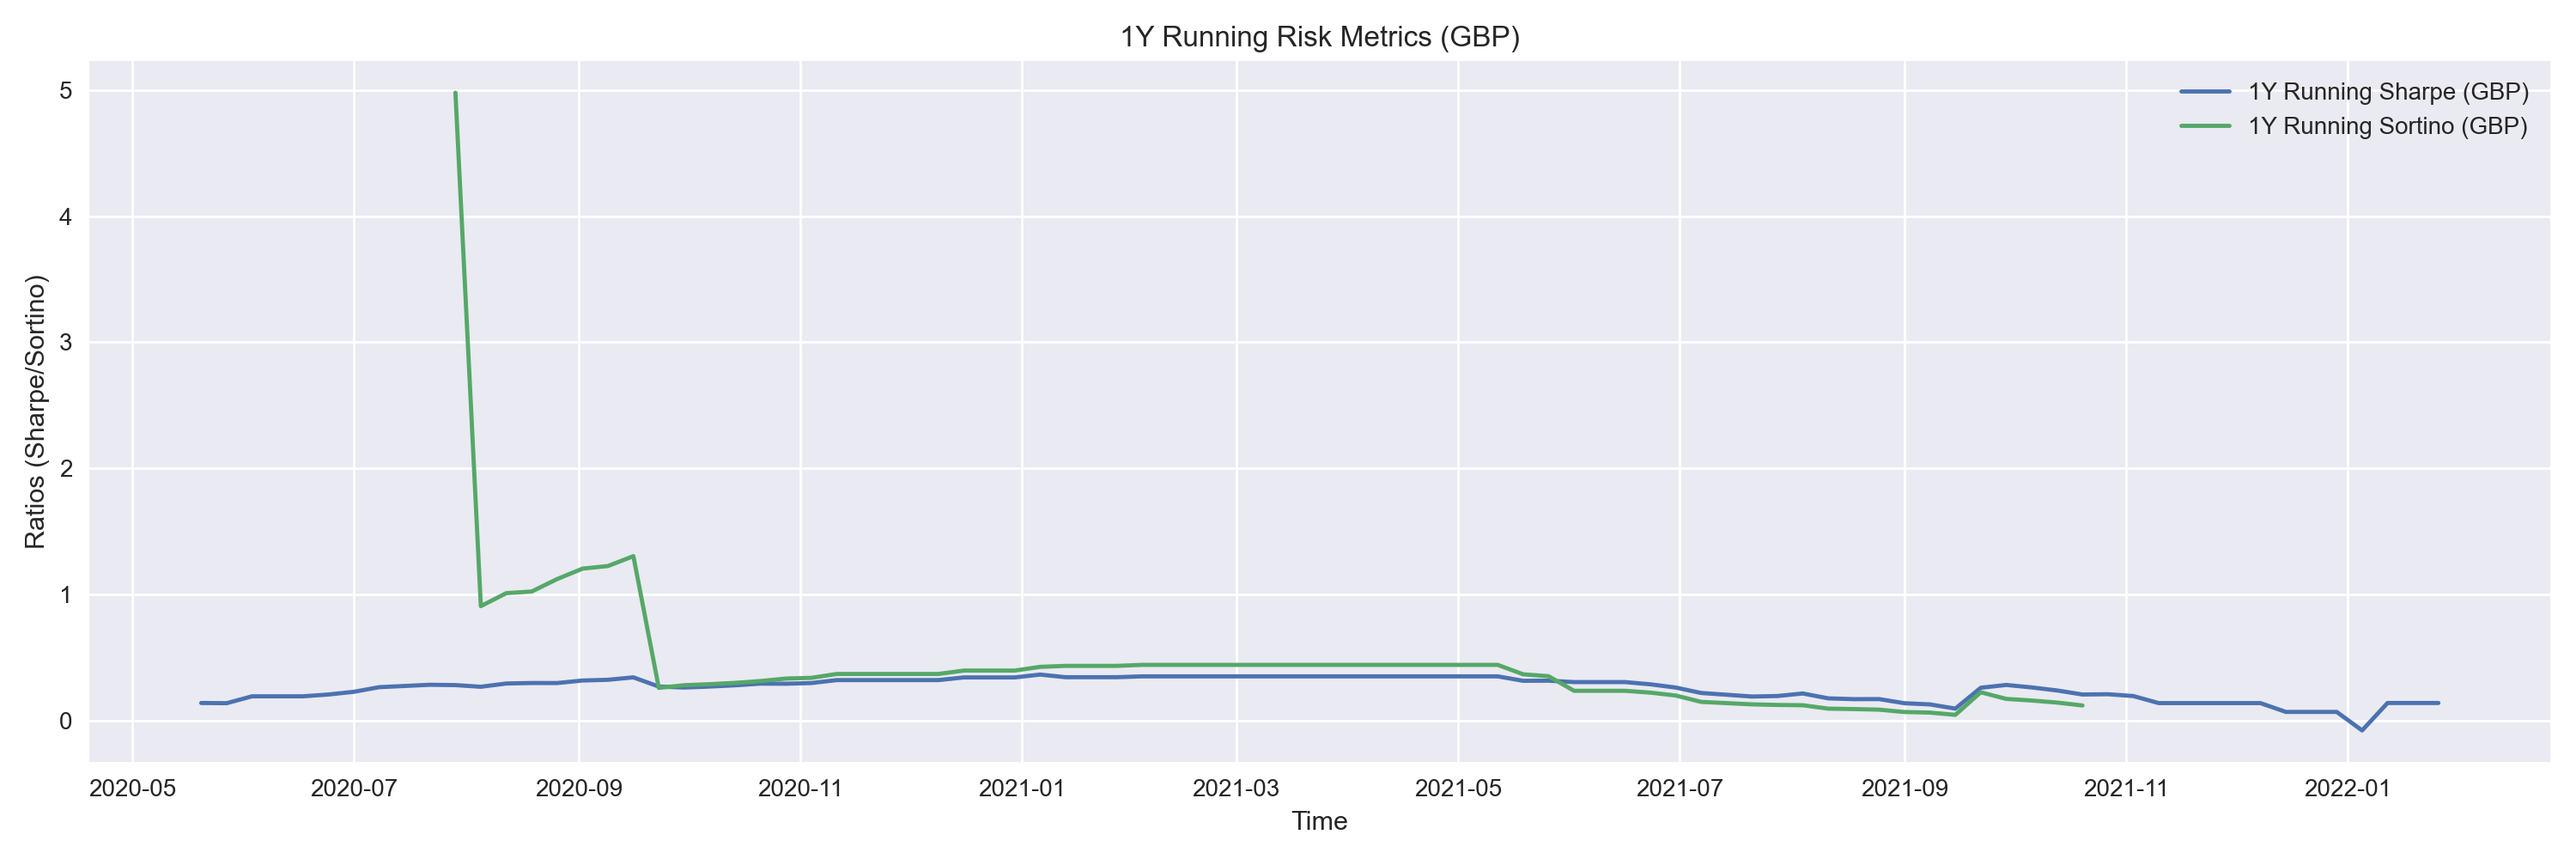

Correlation between Weekly Pnl and it's Components
         fx_pnl_gbp  Bond_Pnl_no_fx_change_gbp
Pnl_GBP   -0.443781                   0.847337 




In [34]:
carry_EGP = carry_trade('EGP')

###    Analysis of the return metrics on GBP-EGP:

    1. The overall Pnl is around GBP 1.3M but we can see that the positions are taken only around 2020-21 because of the condition of the difference in the swap curves of the borrowing and lending currency should be greater than 50bp to hold a position.
    
    2. From the weekly returns plot we can see that there is a significant spike around 2020 which may be possible due to COVID 19 which caused an abnormal return.
    
    3. The majority of the time, the returns fluctuate around zero, which is typical for carry trade returns where interest rate differentials might determine the return and can be relatively stable.
    
    4. Return Distribution : We see a high value of distribution around 0, and have heavy tails and a sharp peak compared to normal distribution. It indicates that the returns have a higher likelihood of extreme values as compared to normal  distribution which can be risky. High kurtosis explains this. 

    5. Cummulative Pnl : PNL is highly sensitive to the FX rates but negatively correlated for the whole period when returns are recorded. Bond Pnl is a major contributor to the cumulative Pnl and it can be seen from the correlation of the pnl and bond pnl. Borrow interest does not bring down the pnl significantly.

    6. Yearly running risk metric: The spike in the Sortino ratio at the beginning of the plot shows a period where the investment had exceptionally high returns relative to its downside risk. The convergence of the Sharpe and Sortino ratios over time suggests that the investment's positive and negative volatility became more balanced as the period of unusually high returns ended. The stability of both ratios at a lower level towards the right side of the plot indicates that the investment's performance relative to both total and downside risk became more consistent, though not particularly high. The fact that both ratios trend towards zero suggests that the investment's returns were similar to the risk-free rate when adjusted for both total and downside risk. This could imply that the investment's performance was neither particularly strong nor weak when considering the risk taken.
    
    7. Market risk factors: Chnage in FX Rate is one of the major risk factor as emerging markets give high interest but the economy is so fragile that the FX rate can increase and the value of the lending currency will decrease. In this case, the FX pnl decreases the cumulative pnl significantly which can be seen from the FX rate increase around 2020-2022 which means EGP became less valuable and hence, the FX Pnl decreases. 
    



## GBP-HUF pair:


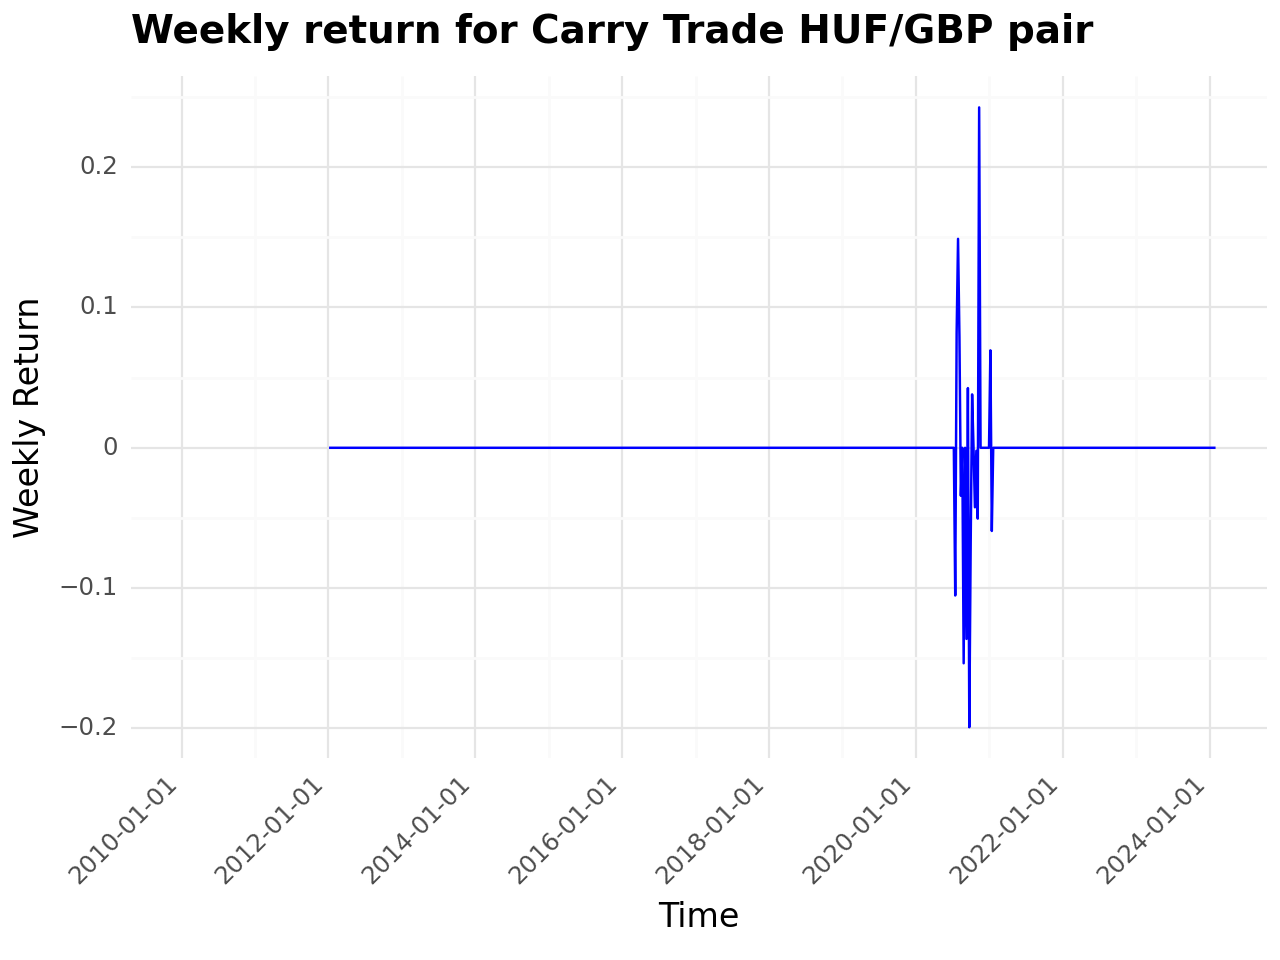

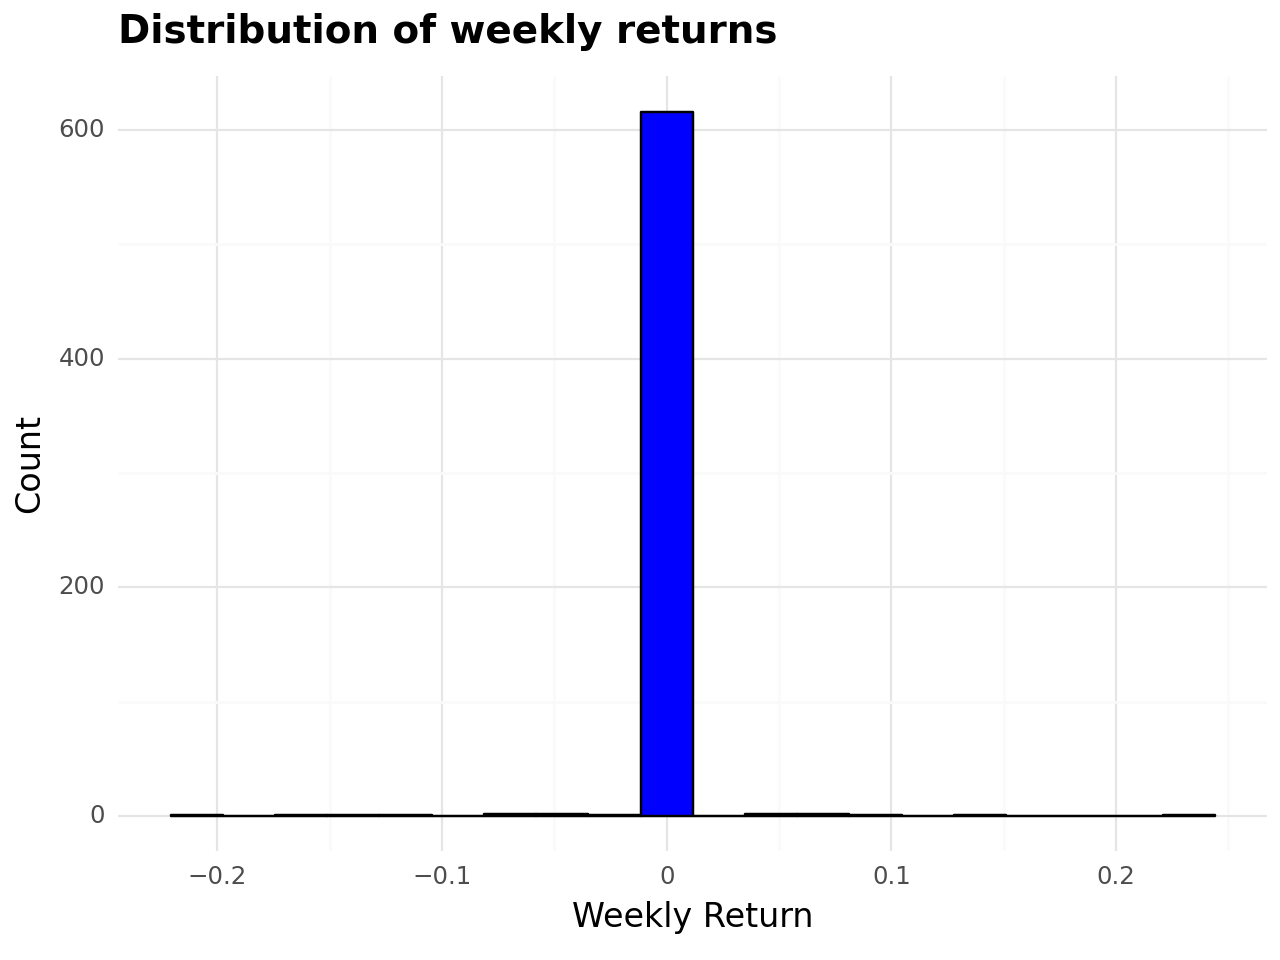




Return description :
count    632.000000
mean      -0.000233
std        0.018168
min       -0.199125
25%        0.000000
50%        0.000000
75%        0.000000
max        0.242580
Name: Return_GBP, dtype: float64
Return Kurtosis is :95.49


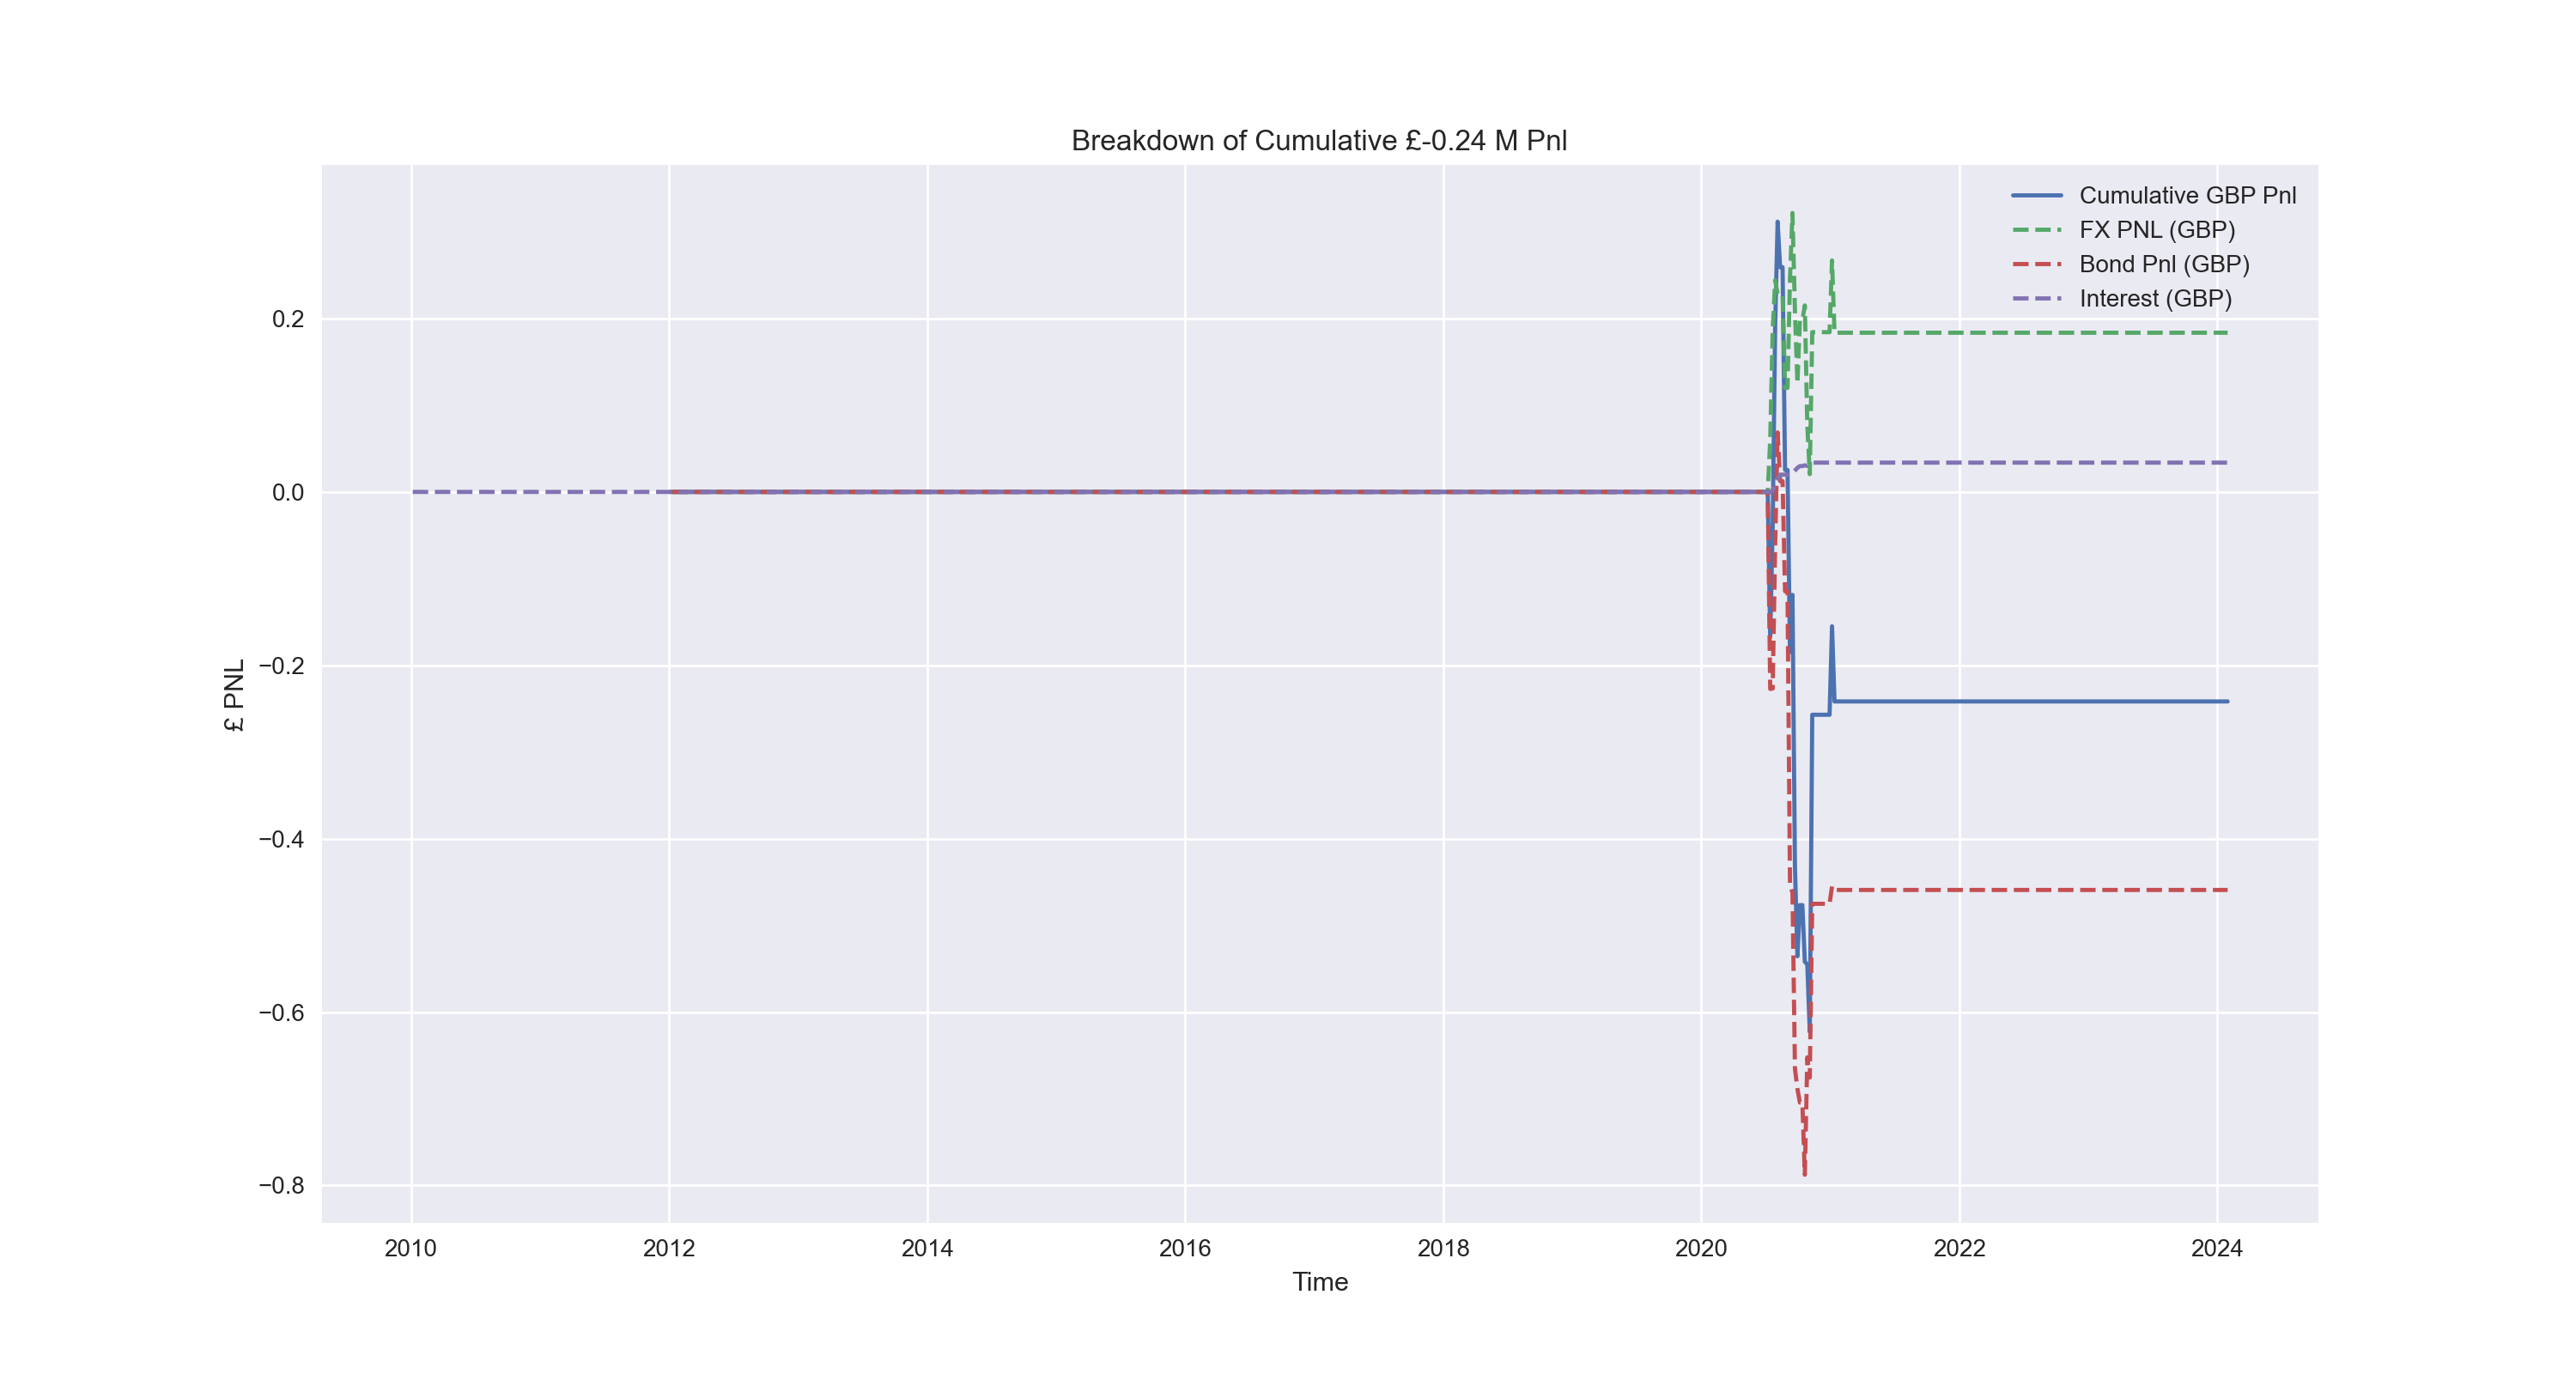

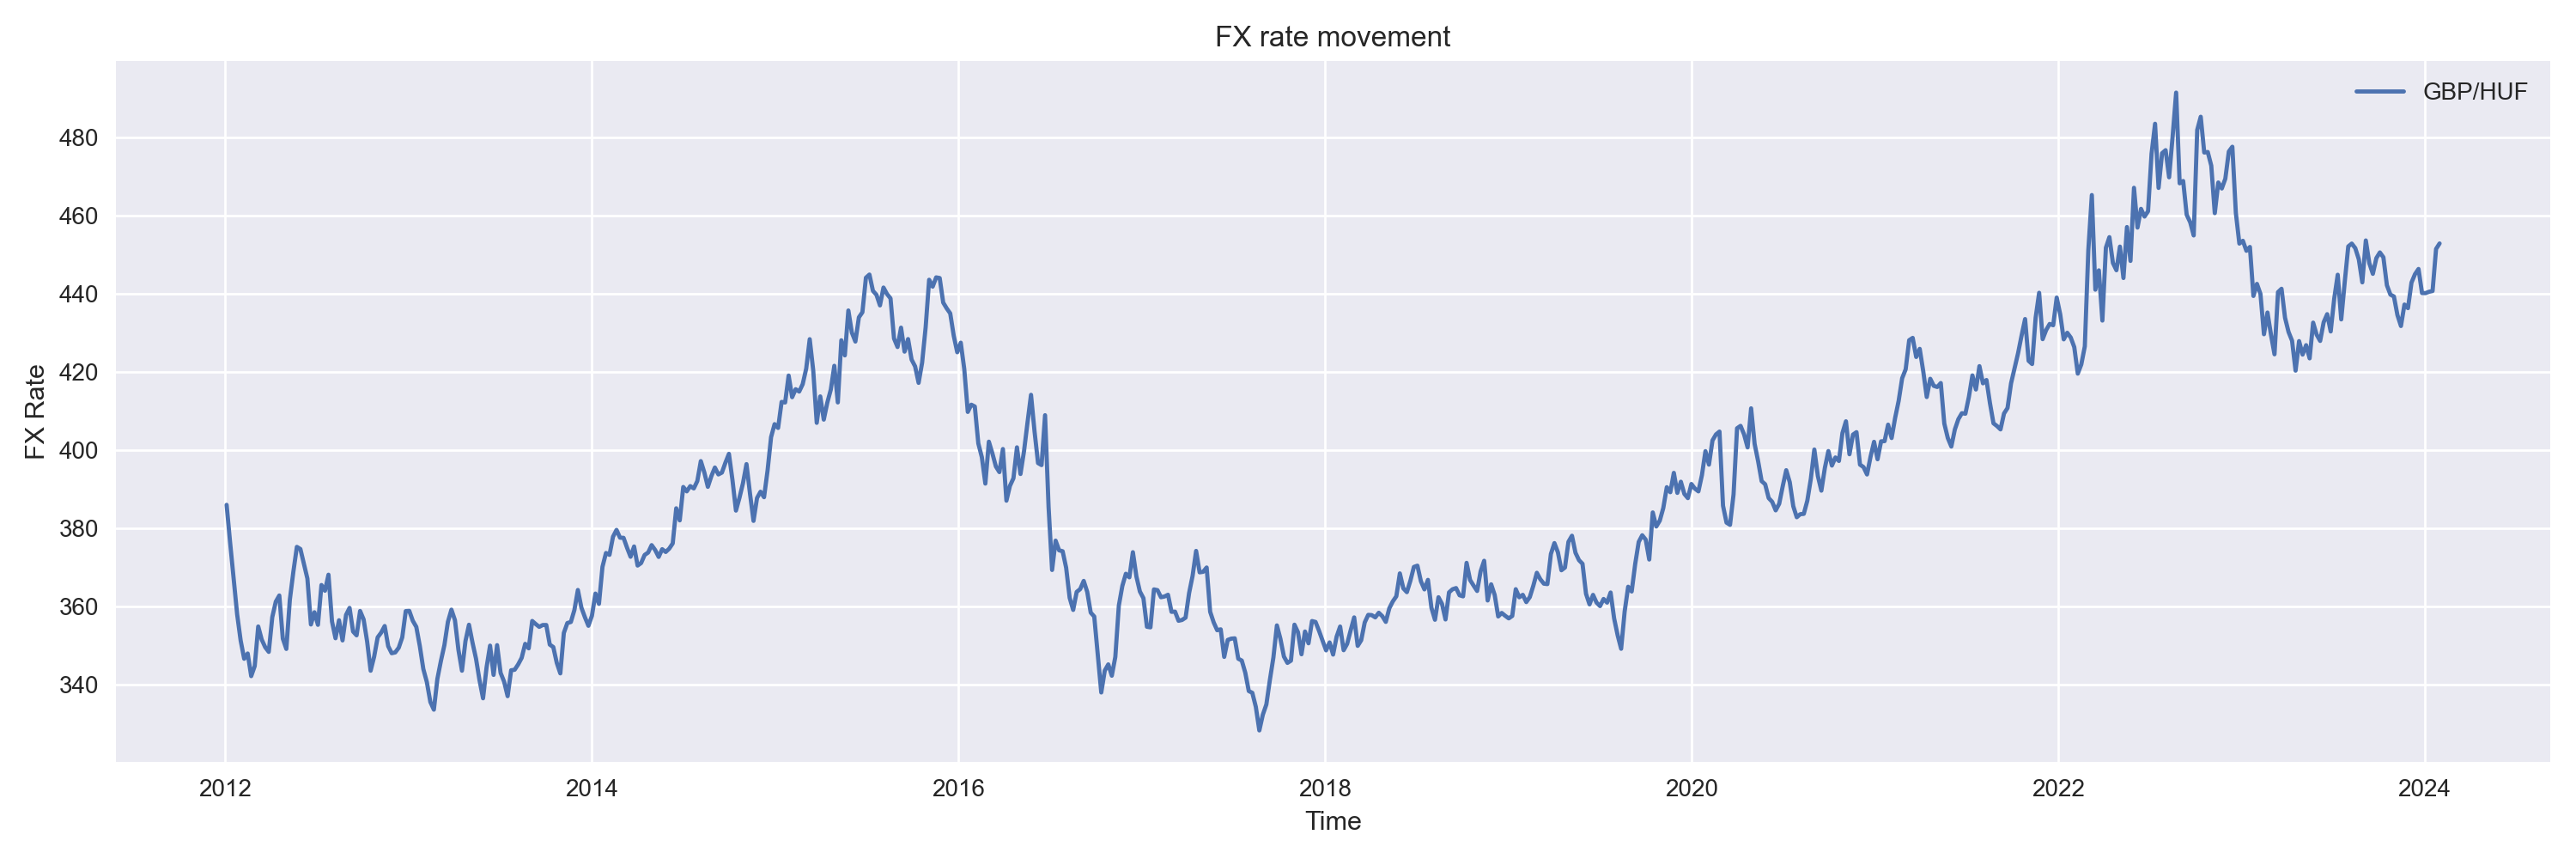

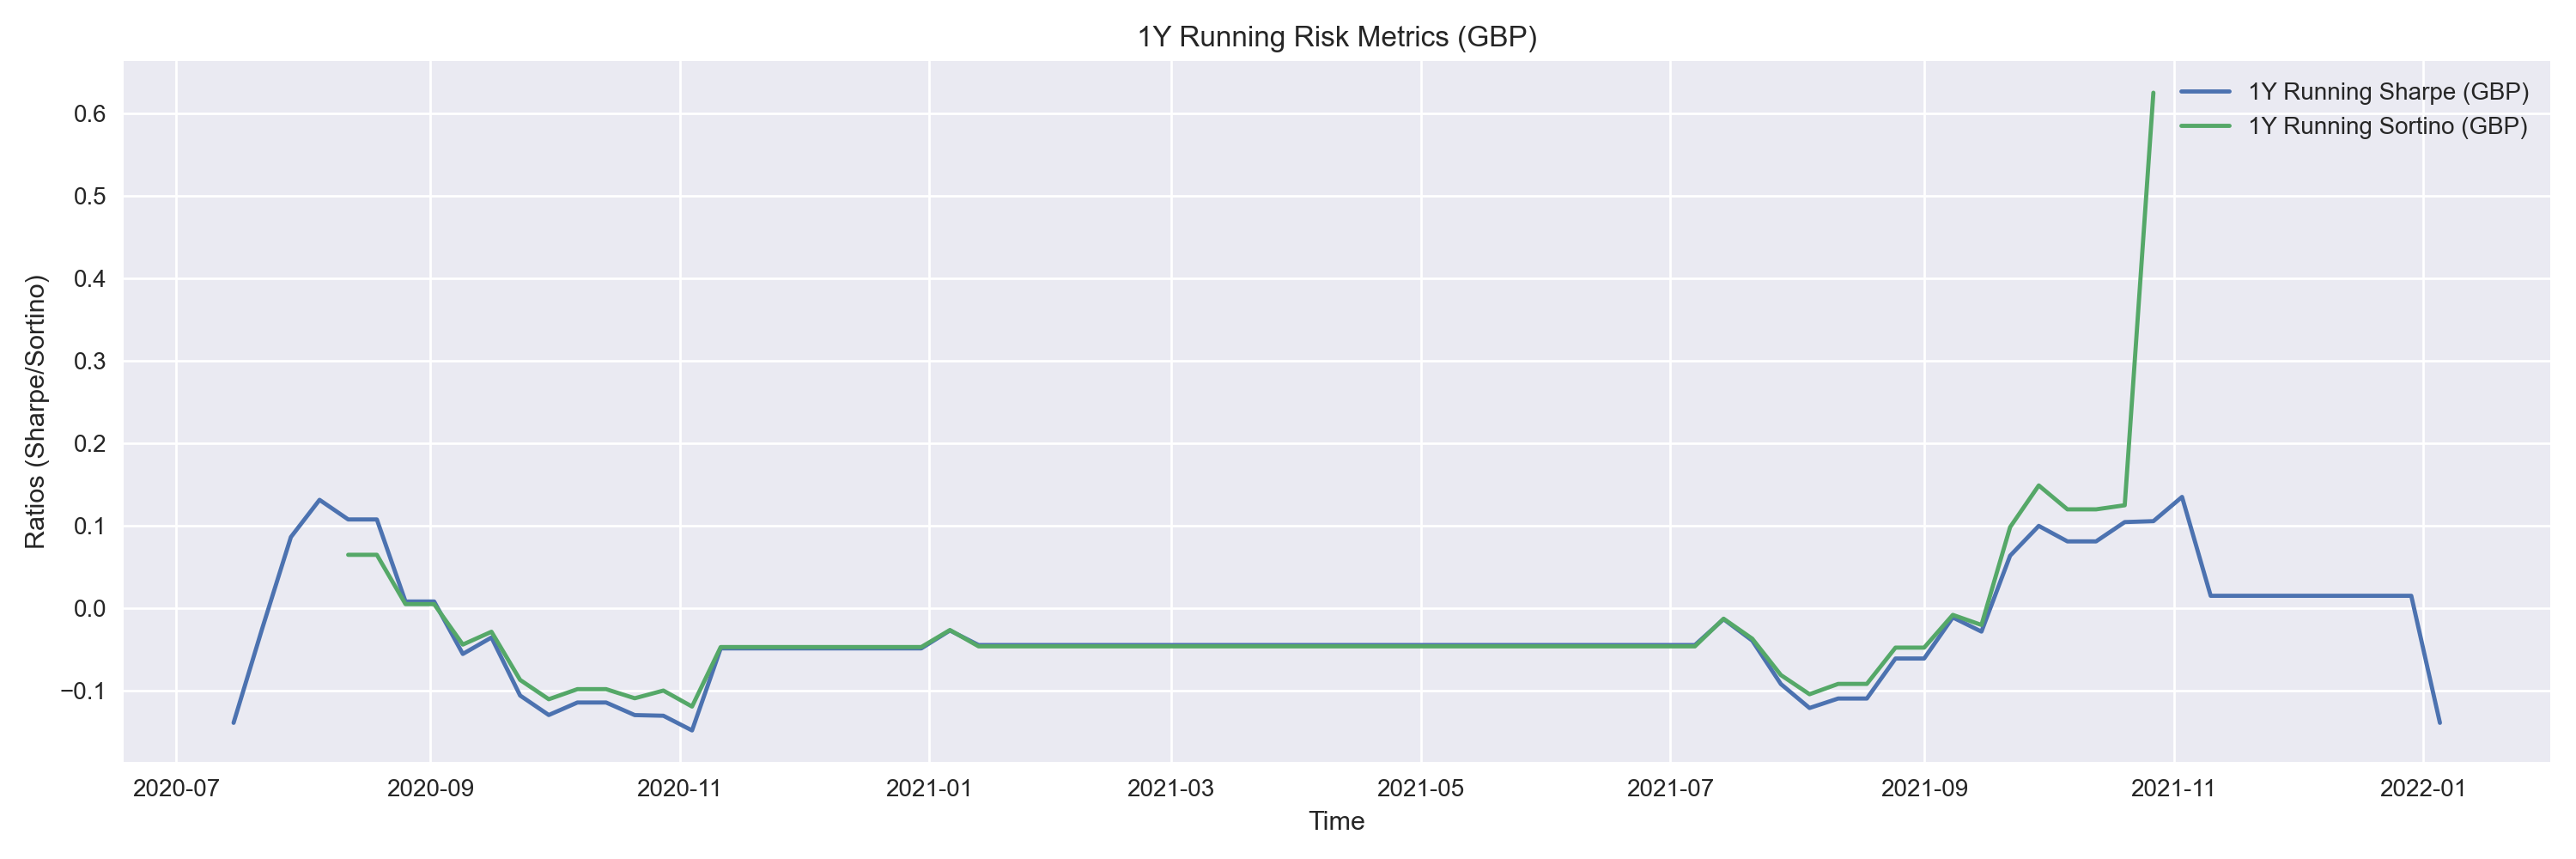

Correlation between Weekly Pnl and it's Components
         fx_pnl_gbp  Bond_Pnl_no_fx_change_gbp
Pnl_GBP    0.557441                   0.839523 




In [35]:
carry_HUF = carry_trade('HUF')

###    Analysis of the return metrics on GBP-HUF:

    1. The overall Pnl is negative which can be confirmed from the high FX rate of GBP-HUF but we can see that the positions are taken only around 2020-21 because of the condition of the difference in the swap curves of the borrowing and lending currency should be greater than 50bp to hold a position.
    
    2. From the weekly returns plot we can see that there is a significant drop around 2020 which may be possible due to COVID 19 which caused an abnormal return and drop in the value of the lending currency which is HUF.
    
    3. The majority of the time, the returns fluctuate around zero, which is typical for carry trade returns where interest rate differentials might determine the return and can be relatively stable.
    
    4. Return Distribution : We see a high value of distribution around 0, and have heavy tails symmetrical on the both sides and a sharp peak compared to normal distribution. It indicates that the returns have a higher likelihood of extreme values as compared to normal  distribution which can be risky. High kurtosis explains this. 

    5. Cummulative Pnl : PNL is highly sensitive to the FX rates and positively correlated for the whole period when returns are recorded. FX returns are major contributor towards increasing the Pnl.

    6. Yearly running risk metric: Both ratios are relatively stable and hover around zero for the most period of time. This suggests that the investment was neither significantly overperforming nor underperforming. The divergence at the end of the plot, with the Sortino ratio increasing sharply while the Sharpe ratio decreases indicates a period where the investment had a string of positive returns that improved the risk-adjusted return. The sharp decline in the Sharpe ratio at the end of the period, going below zero, could be due to a sharp increase in volatility.
    
    7. Market risk factors: In this case, the change in FX rates actually increases the cumulative pnl significantly.



## GBP-CRC pair:

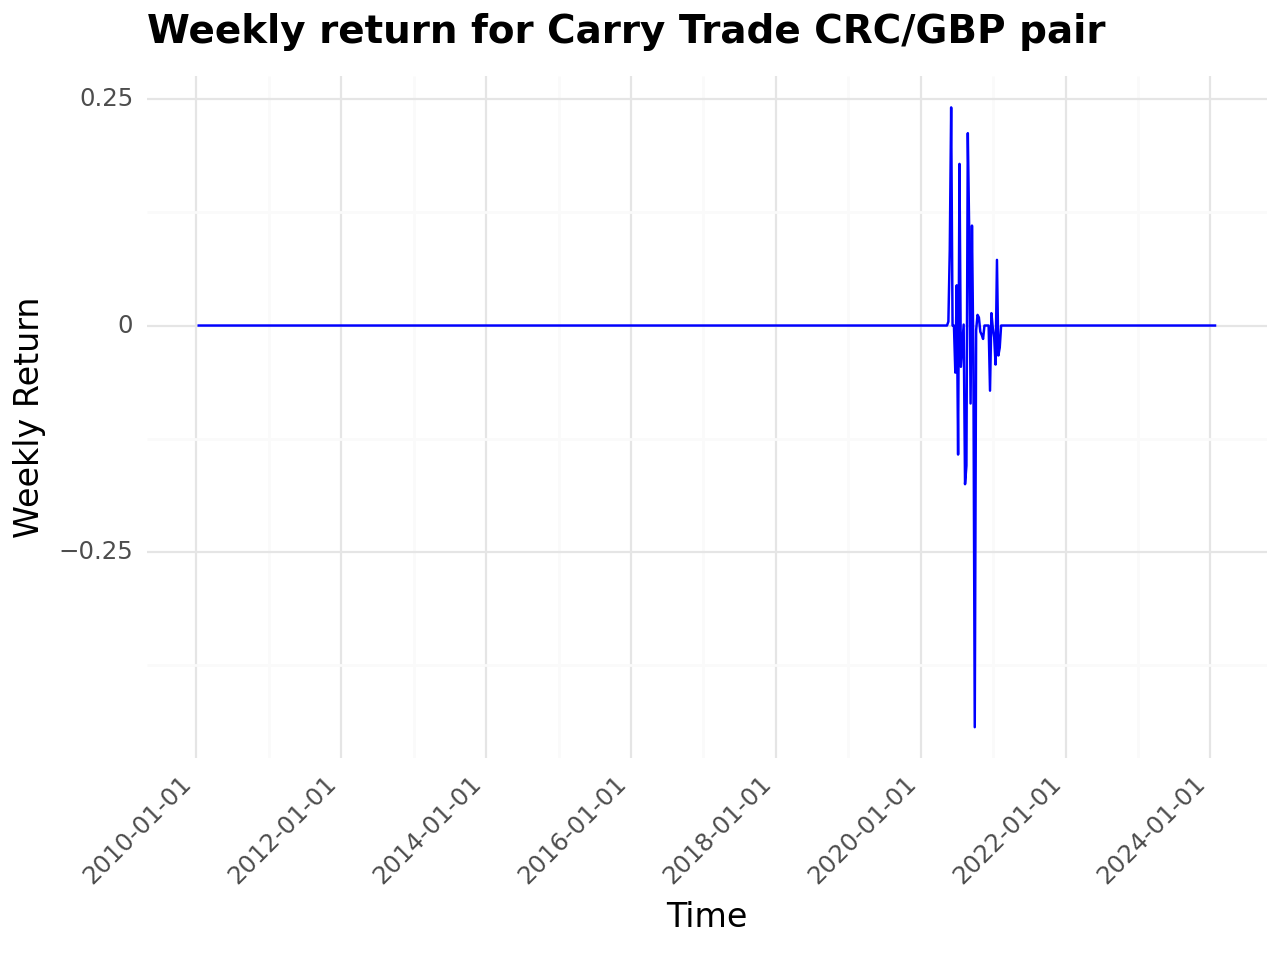

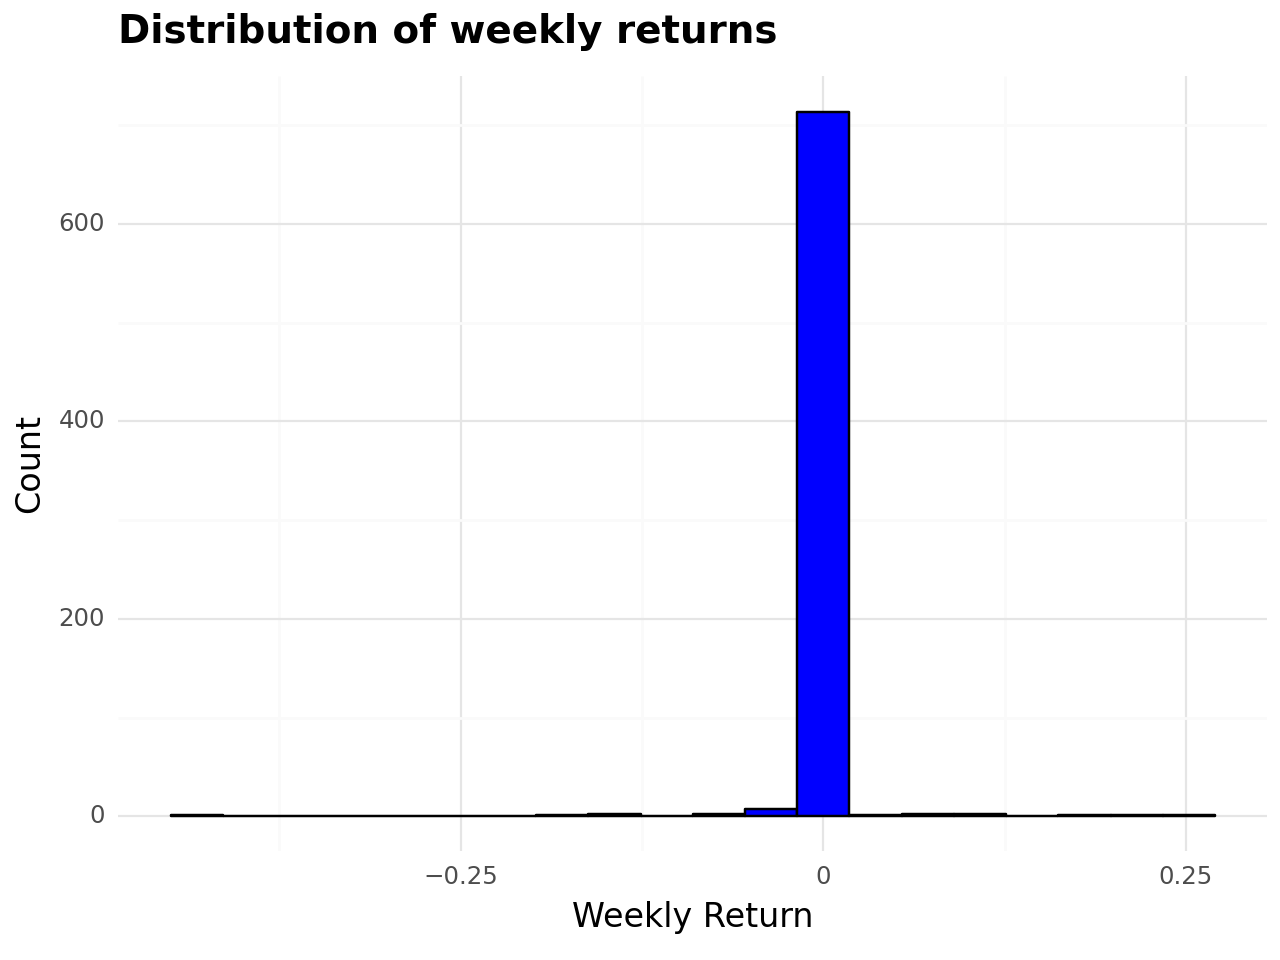




Return description :
count    735.000000
mean      -0.000401
std        0.025219
min       -0.443295
25%        0.000000
50%        0.000000
75%        0.000000
max        0.240734
Name: Return_GBP, dtype: float64
Return Kurtosis is :157.53


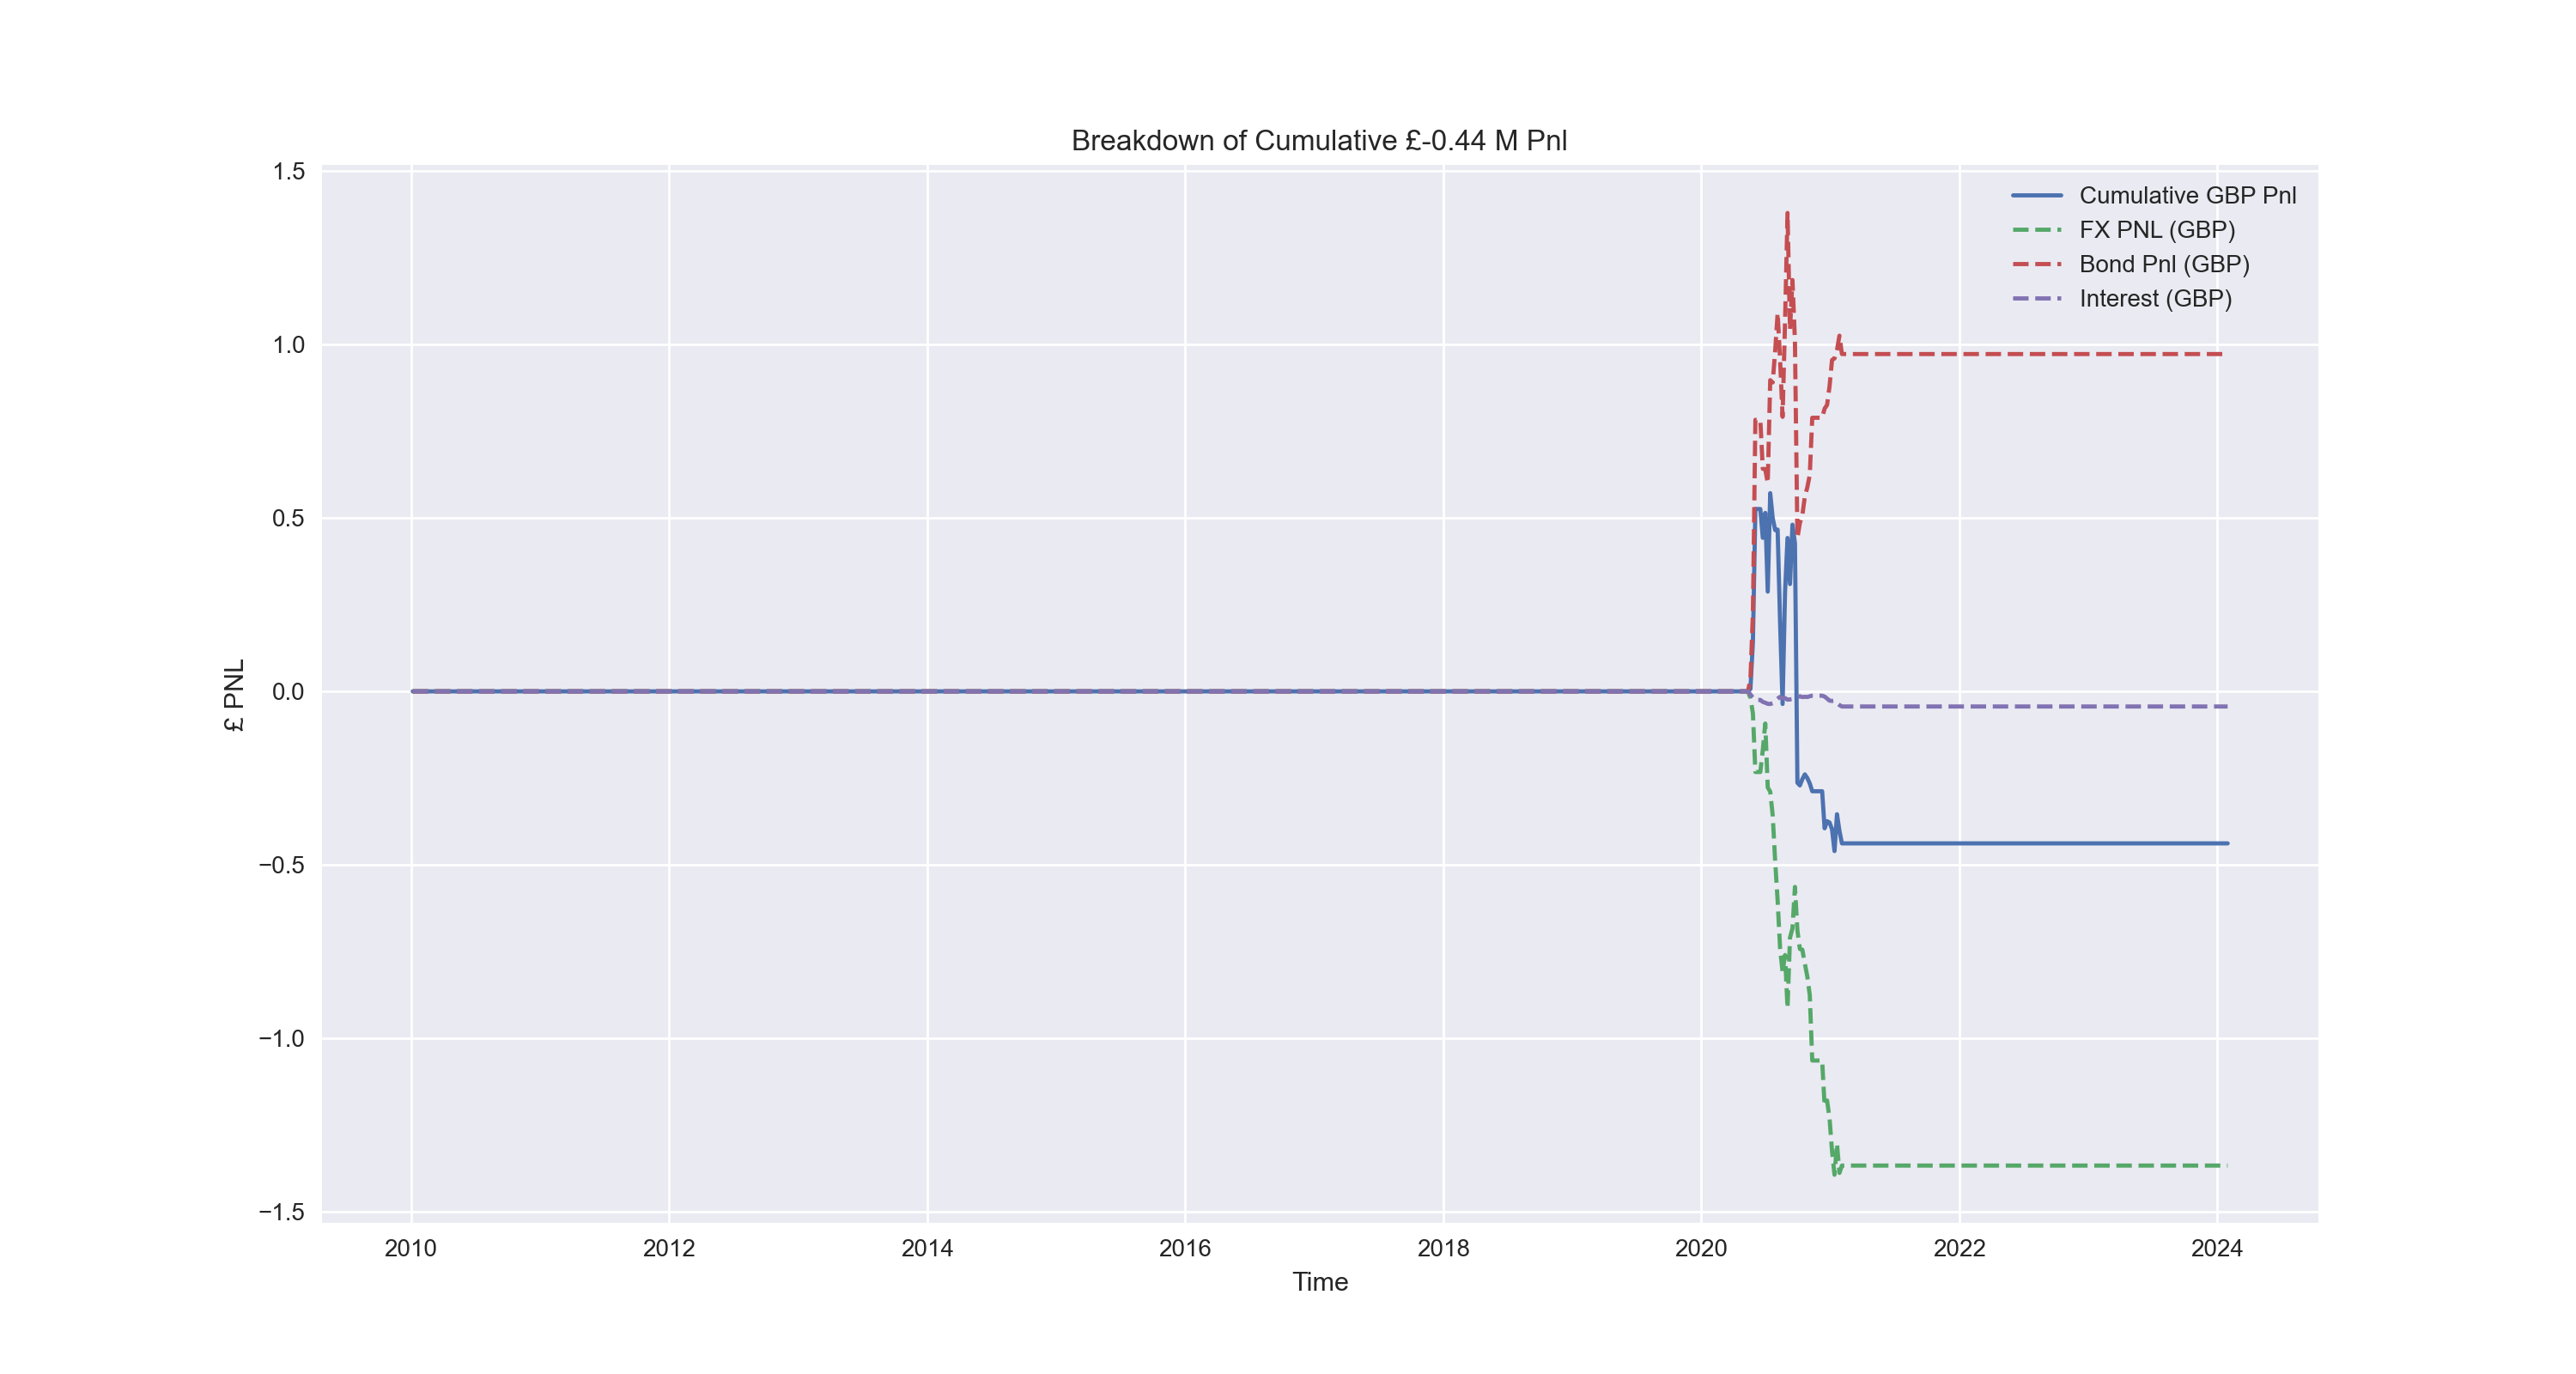

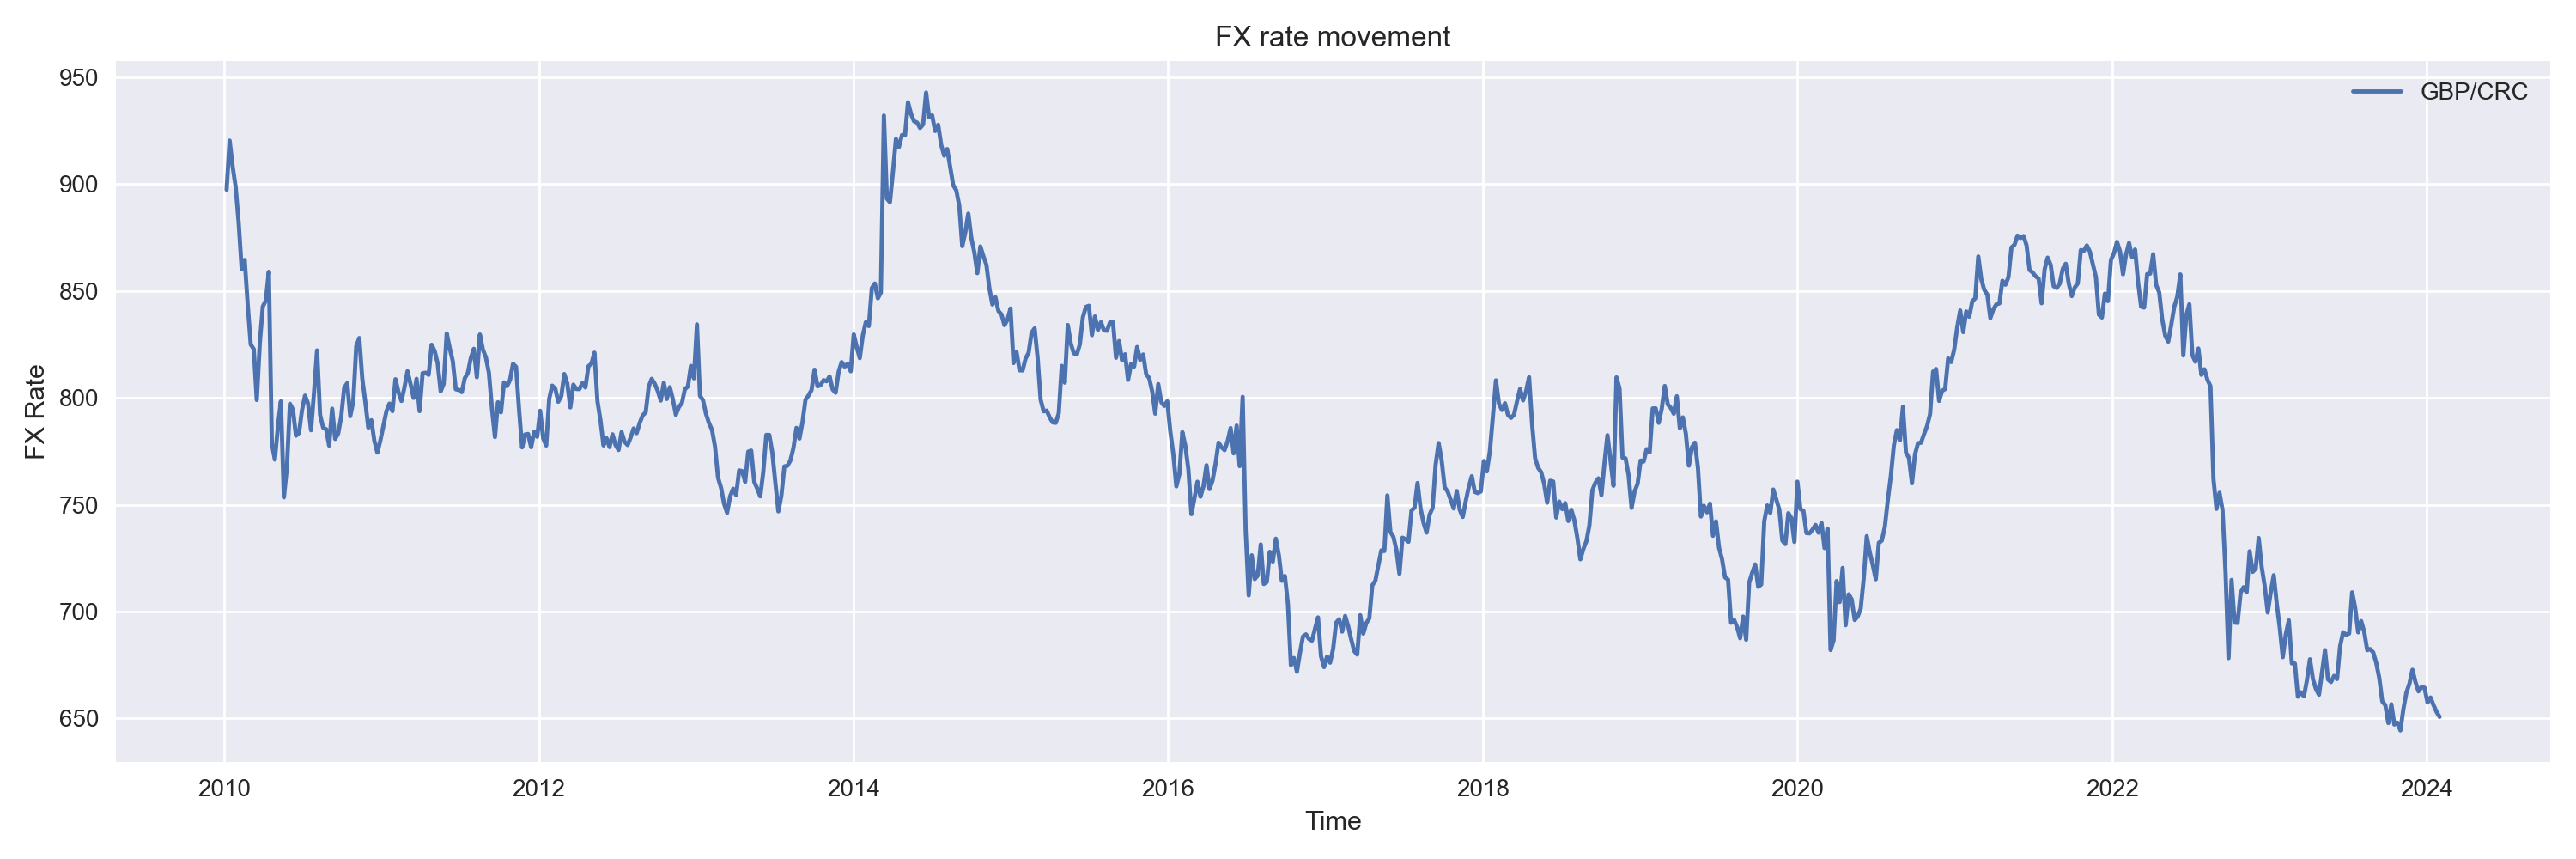

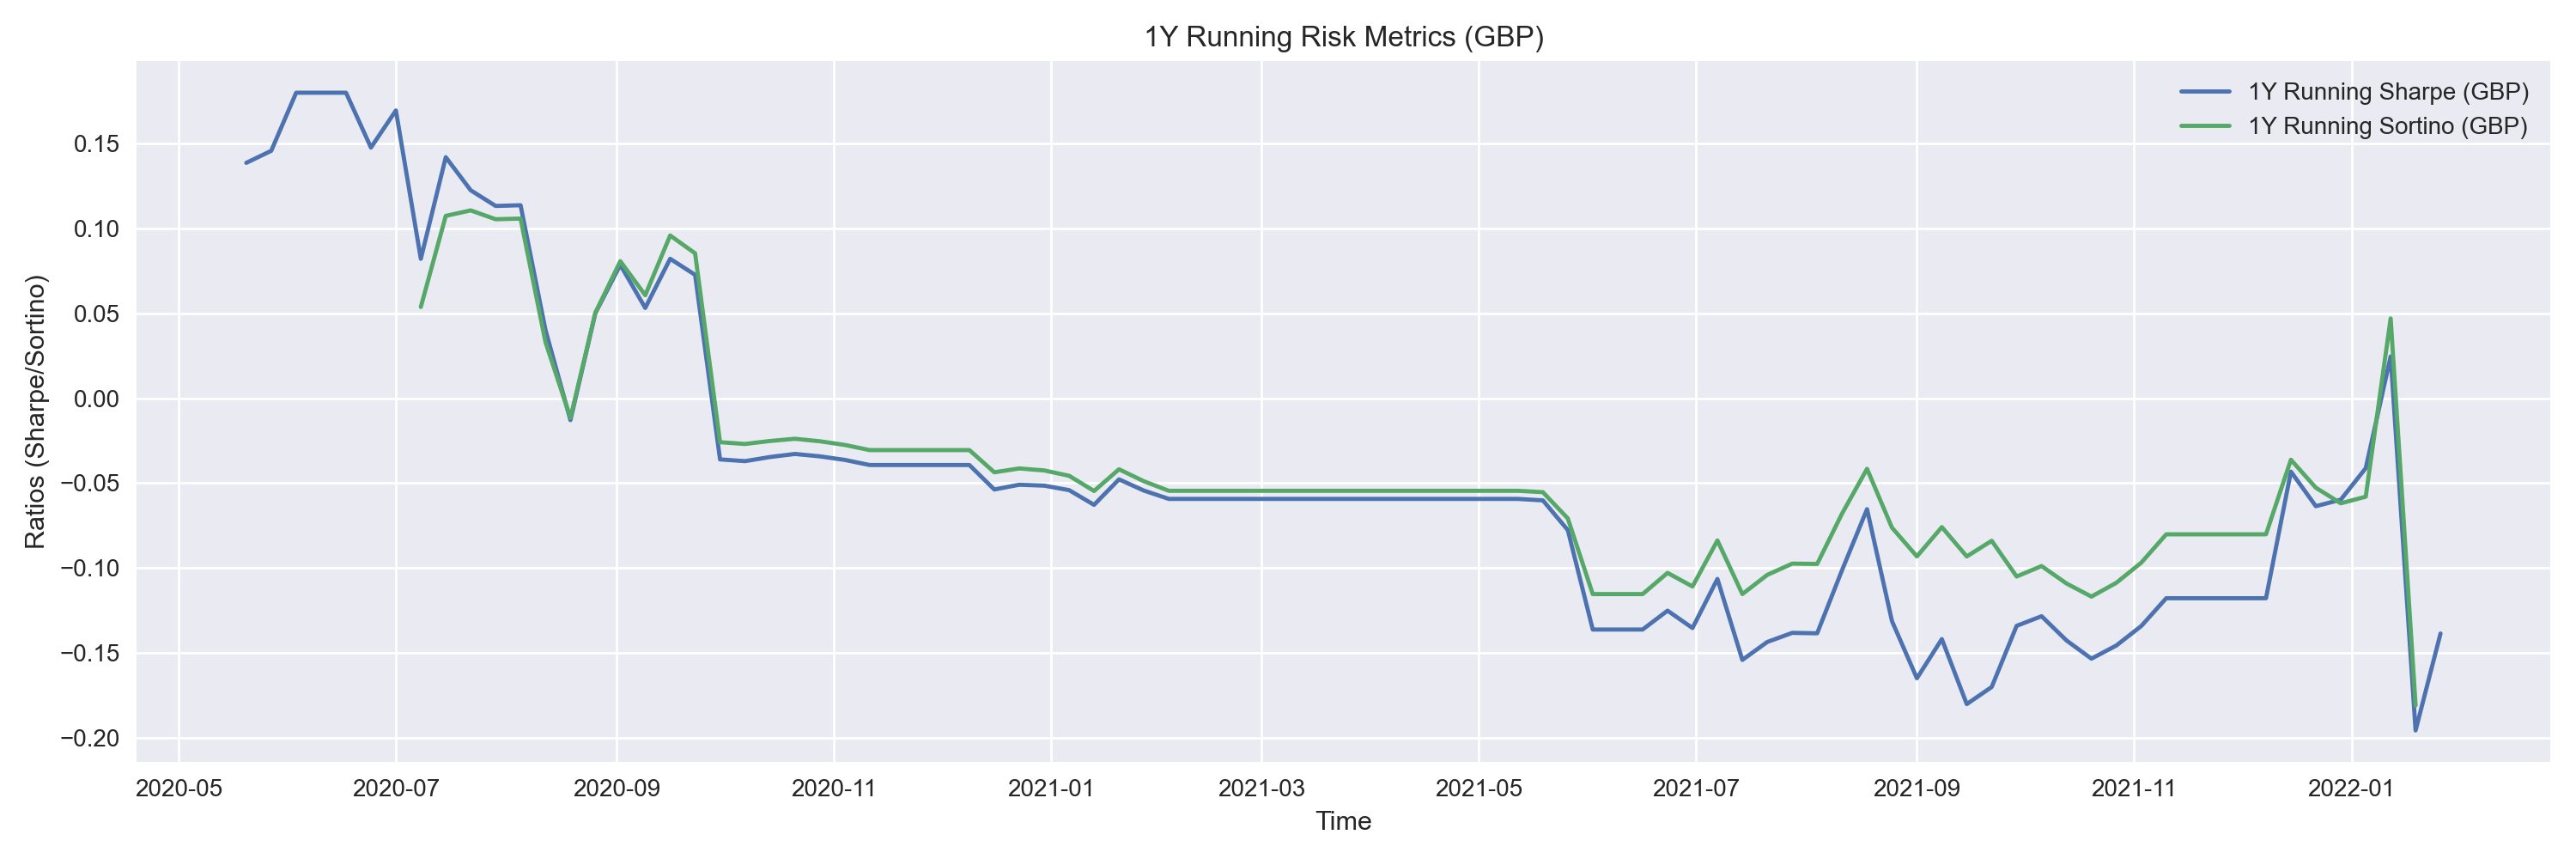

Correlation between Weekly Pnl and it's Components
         fx_pnl_gbp  Bond_Pnl_no_fx_change_gbp
Pnl_GBP    0.195421                   0.864198 




In [36]:
carry_CRC = carry_trade('CRC')

###    Analysis of the return metrics on GBP-CRC:

    1. The overall Pnl is negative which can be confirmed from the huge drop in the FX rate of GBP-CRC but we can see that the positions are taken only around 2020-21 because of the condition of the difference in the swap curves of the borrowing and lending currency should be greater than 50bp to hold a position.
    
    2. The majority of the time, the returns fluctuate around zero, which is typical for carry trade returns where interest rate differentials might determine the return and can be relatively stable.
    
    3. Return Distribution : We see a high value of distribution around 0, and have heavy tails on the left side and a sharp peak compared to normal distribution. It indicates that the returns have a higher likelihood of extreme values as compared to normal distribution which can be risky. High kurtosis explains this. 

    4. Cummulative Pnl : Around 2020, the GBP depreciated sharply against the CRC. This depreciation has adversely affected the foreign exchange PnL of the investment PNL. The recovery in the bond PnL suggests some resilience or correction in that component of the investment, which may have offset some of the forex losses.

    5. Yearly running risk metric: From 2020-08 until 2021-06 the downside risk (Sortino) was in line with the total risk (Sharpe), indicating that negative returns were not disproportionately impacting the investment's performance. For the later part of 2021, the Sortino ratio increases while the Sharpe ratio decreases sharply. This divergence could suggest a scenario where the investment experienced positive returns which increased its total volatility (affecting the Sharpe ratio) but did not significantly increase downside volatility (which would impact the Sortino ratio). This could be seen as a favorable period for the investment from the perspective of an investor who is focused on avoiding losses rather than achieving high returns.

    6. Market risk factors: In this case, the negative change in FX rates actually decreases the cumulative pnl significantly.



## GBP-RON pair:

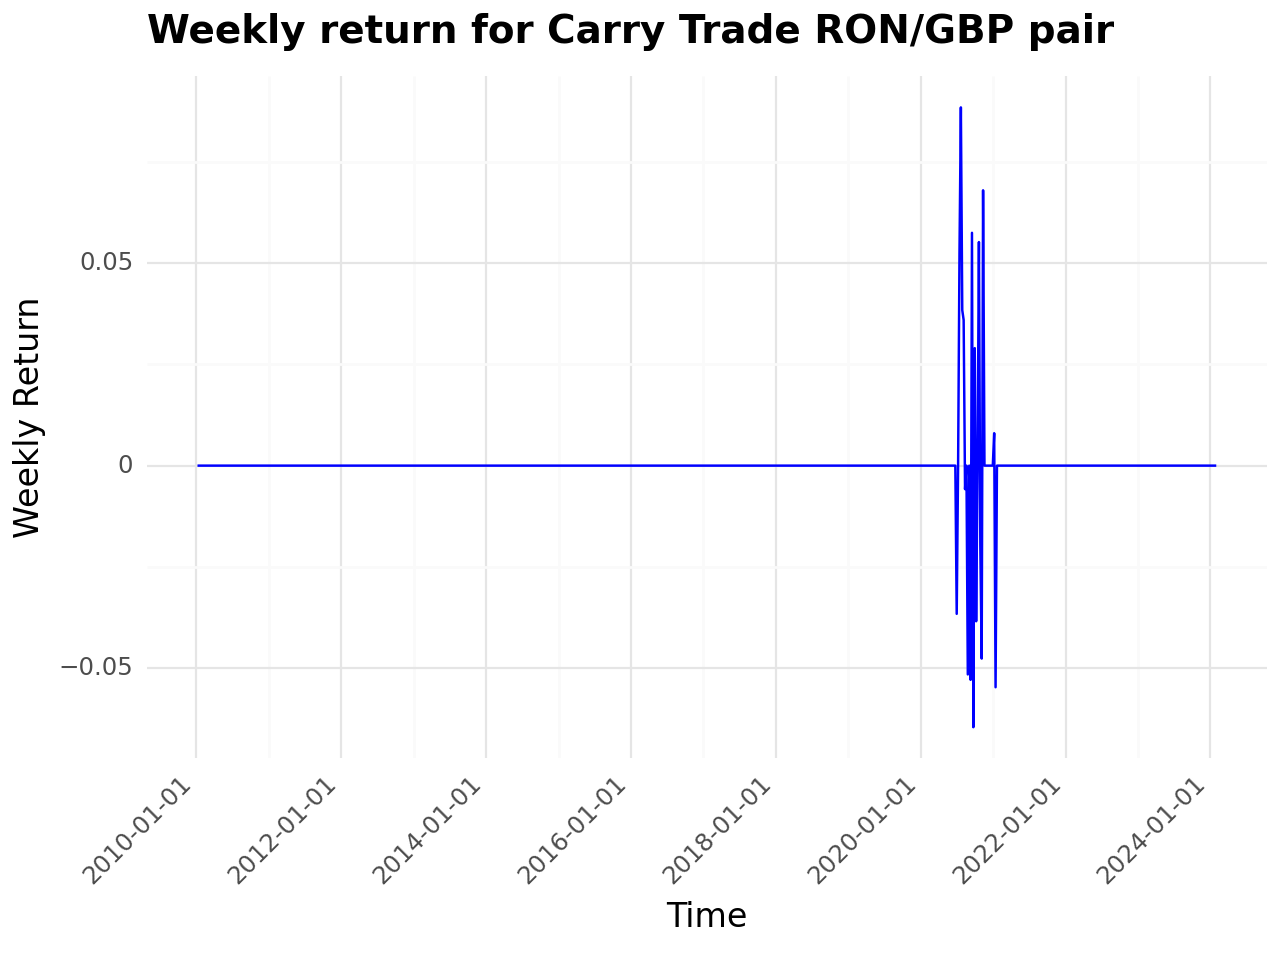

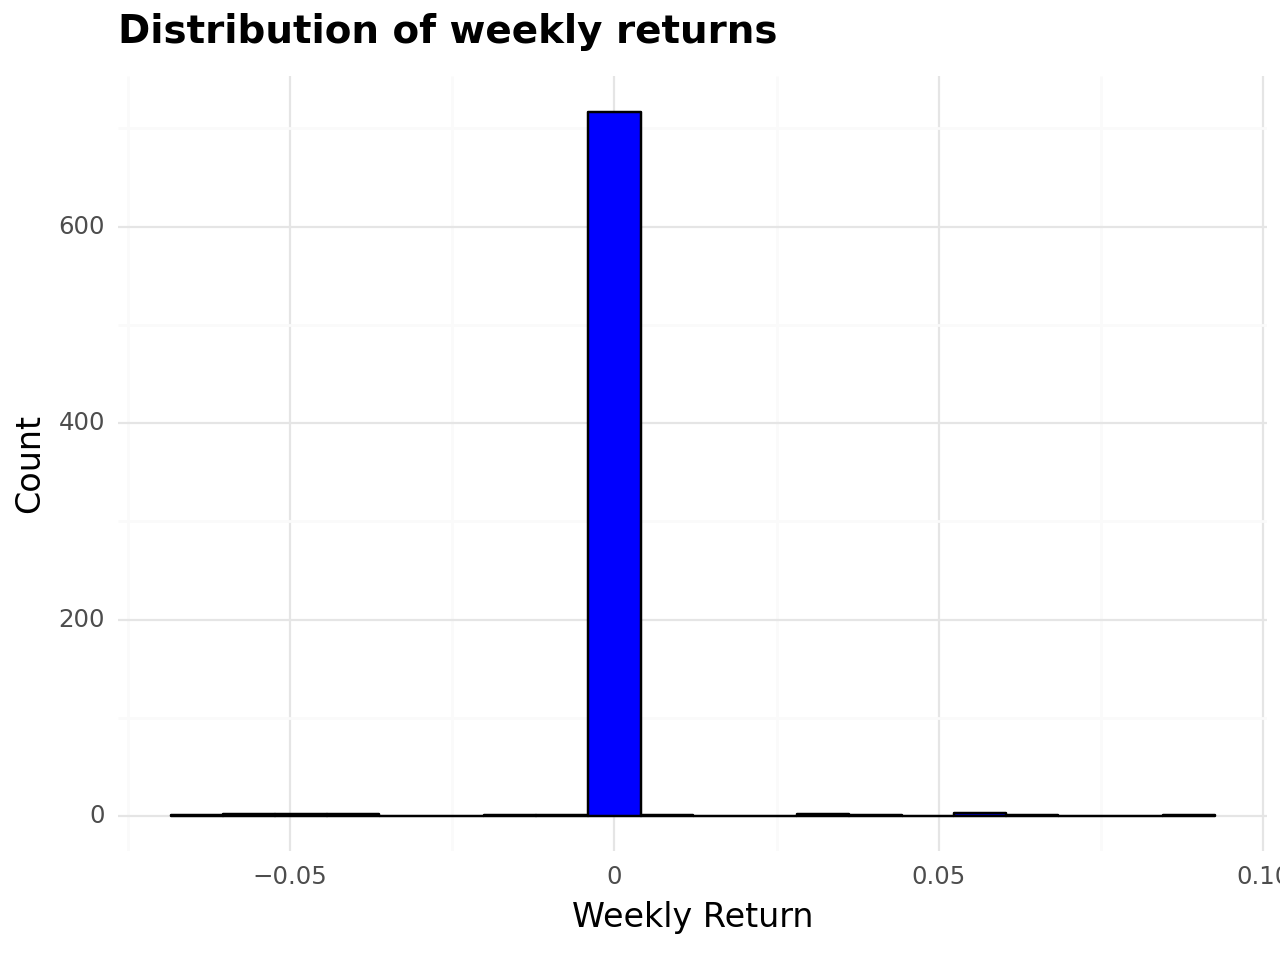




Return description :
count    735.000000
mean       0.000083
std        0.007680
min       -0.064530
25%        0.000000
50%        0.000000
75%        0.000000
max        0.088376
Name: Return_GBP, dtype: float64
Return Kurtosis is :62.04


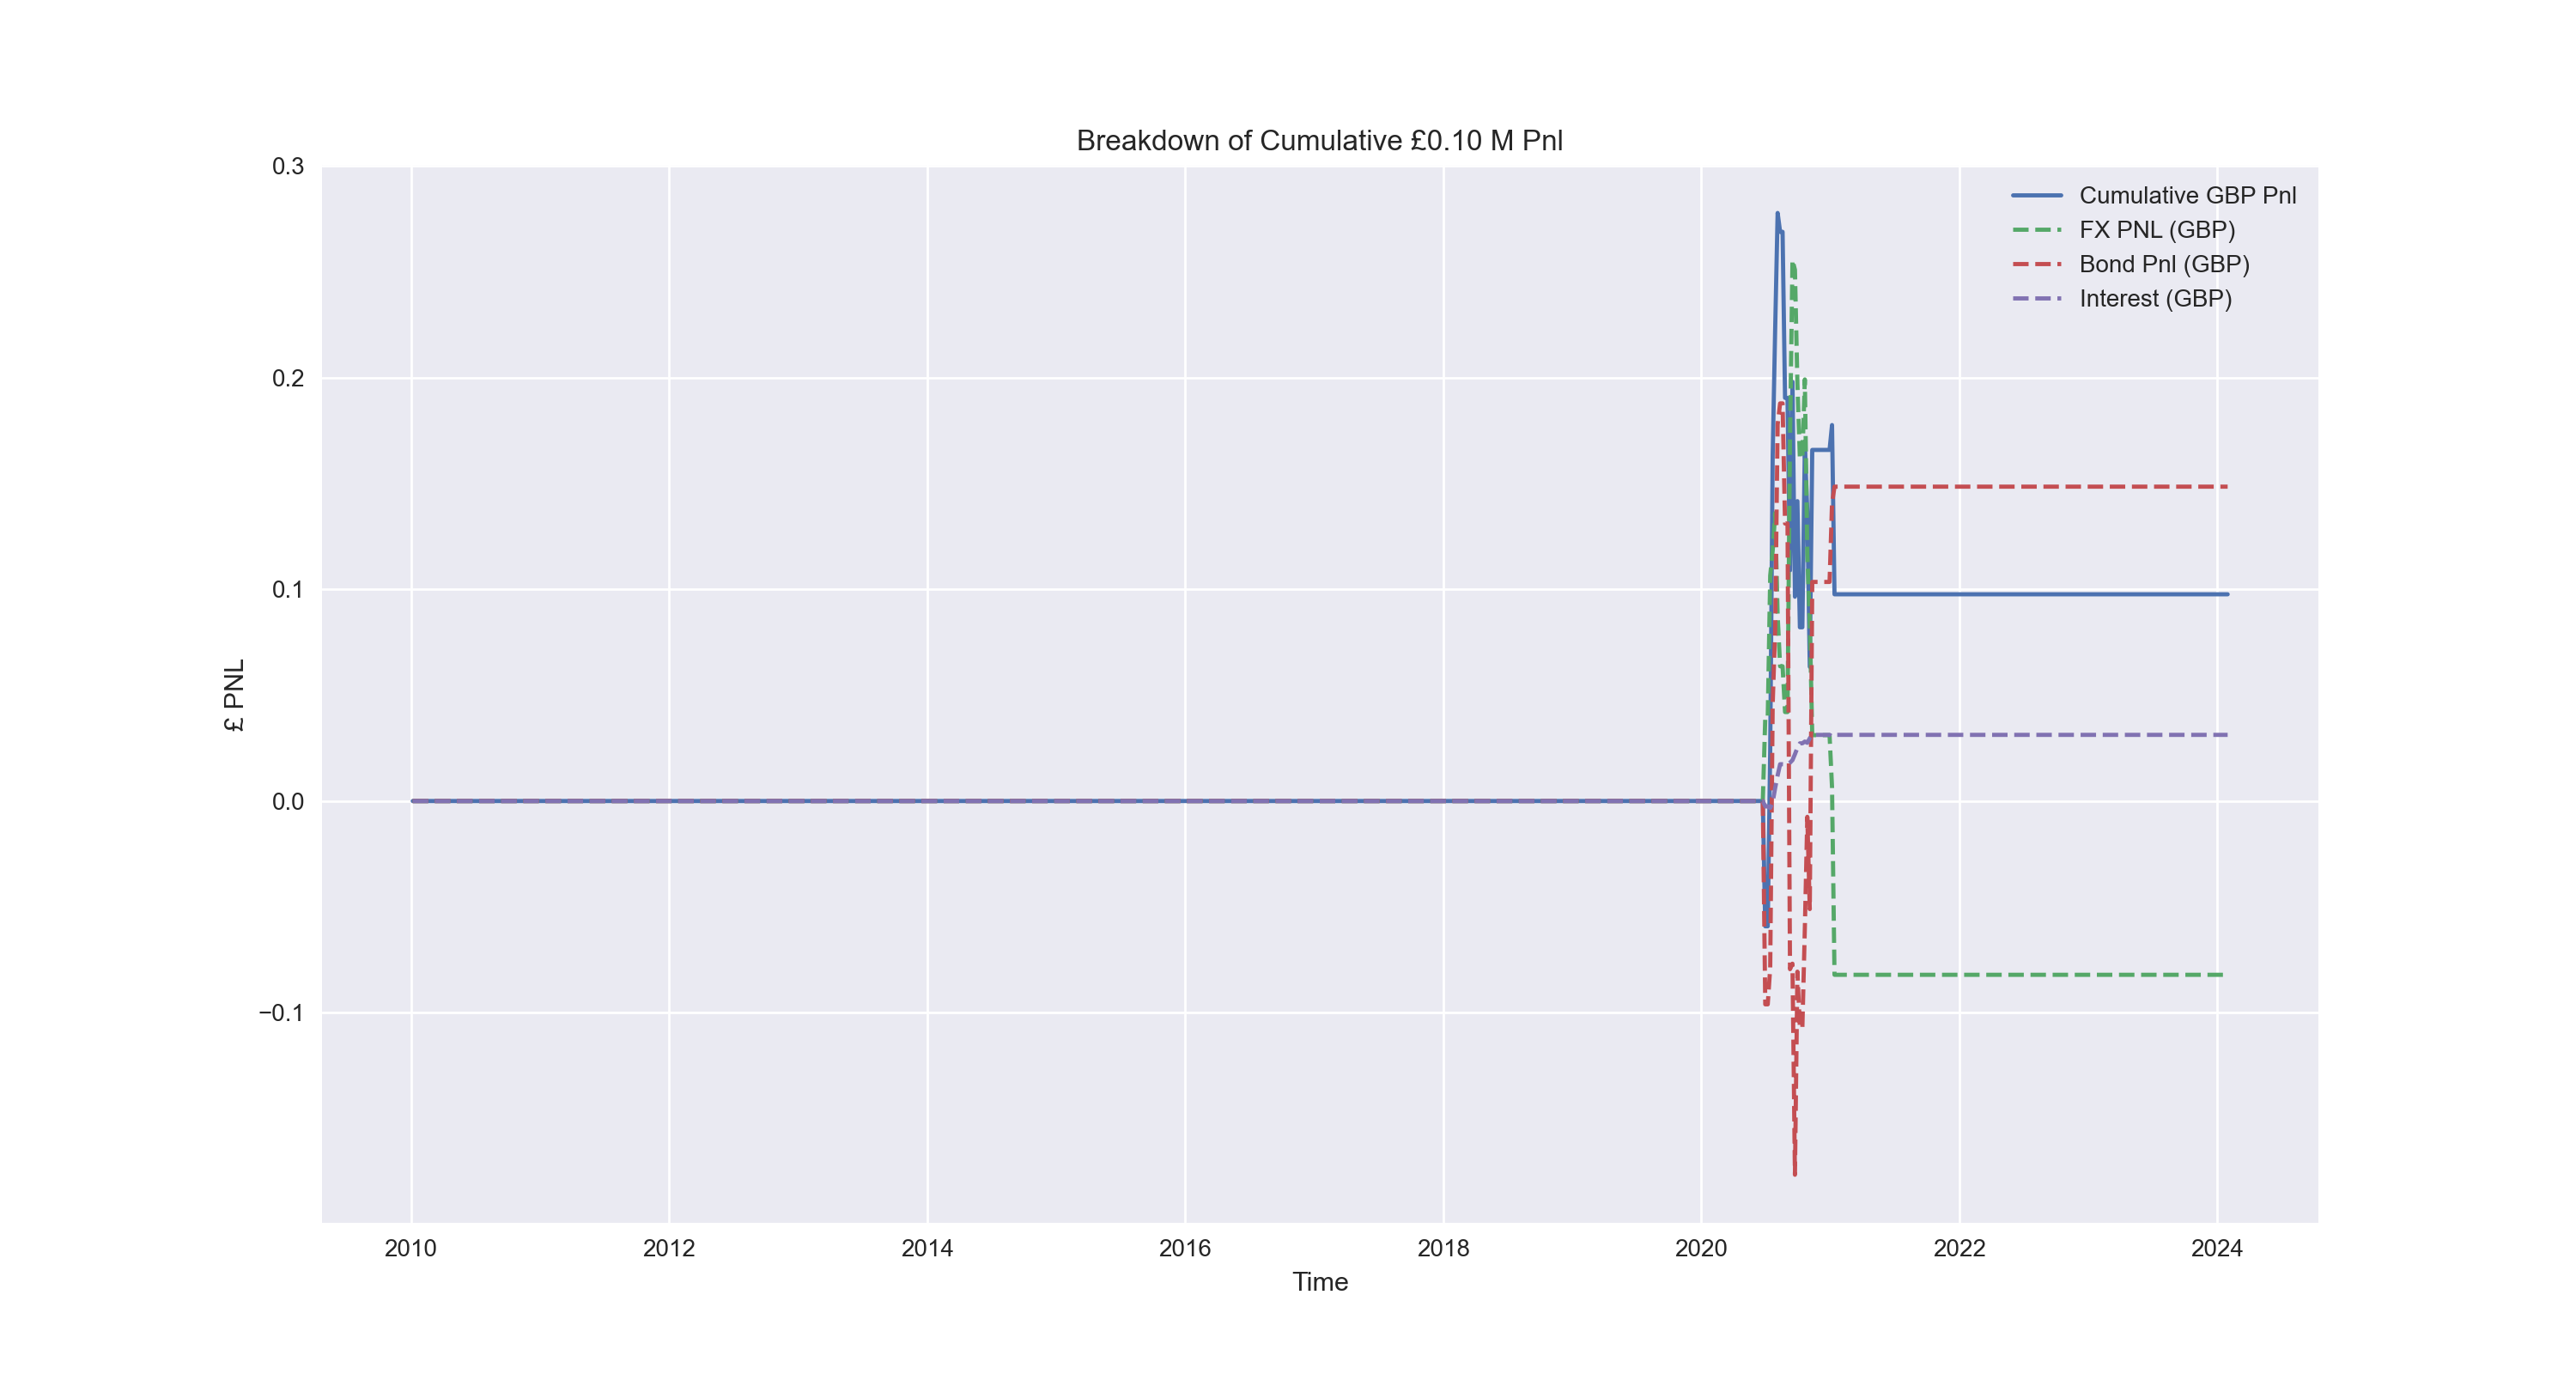

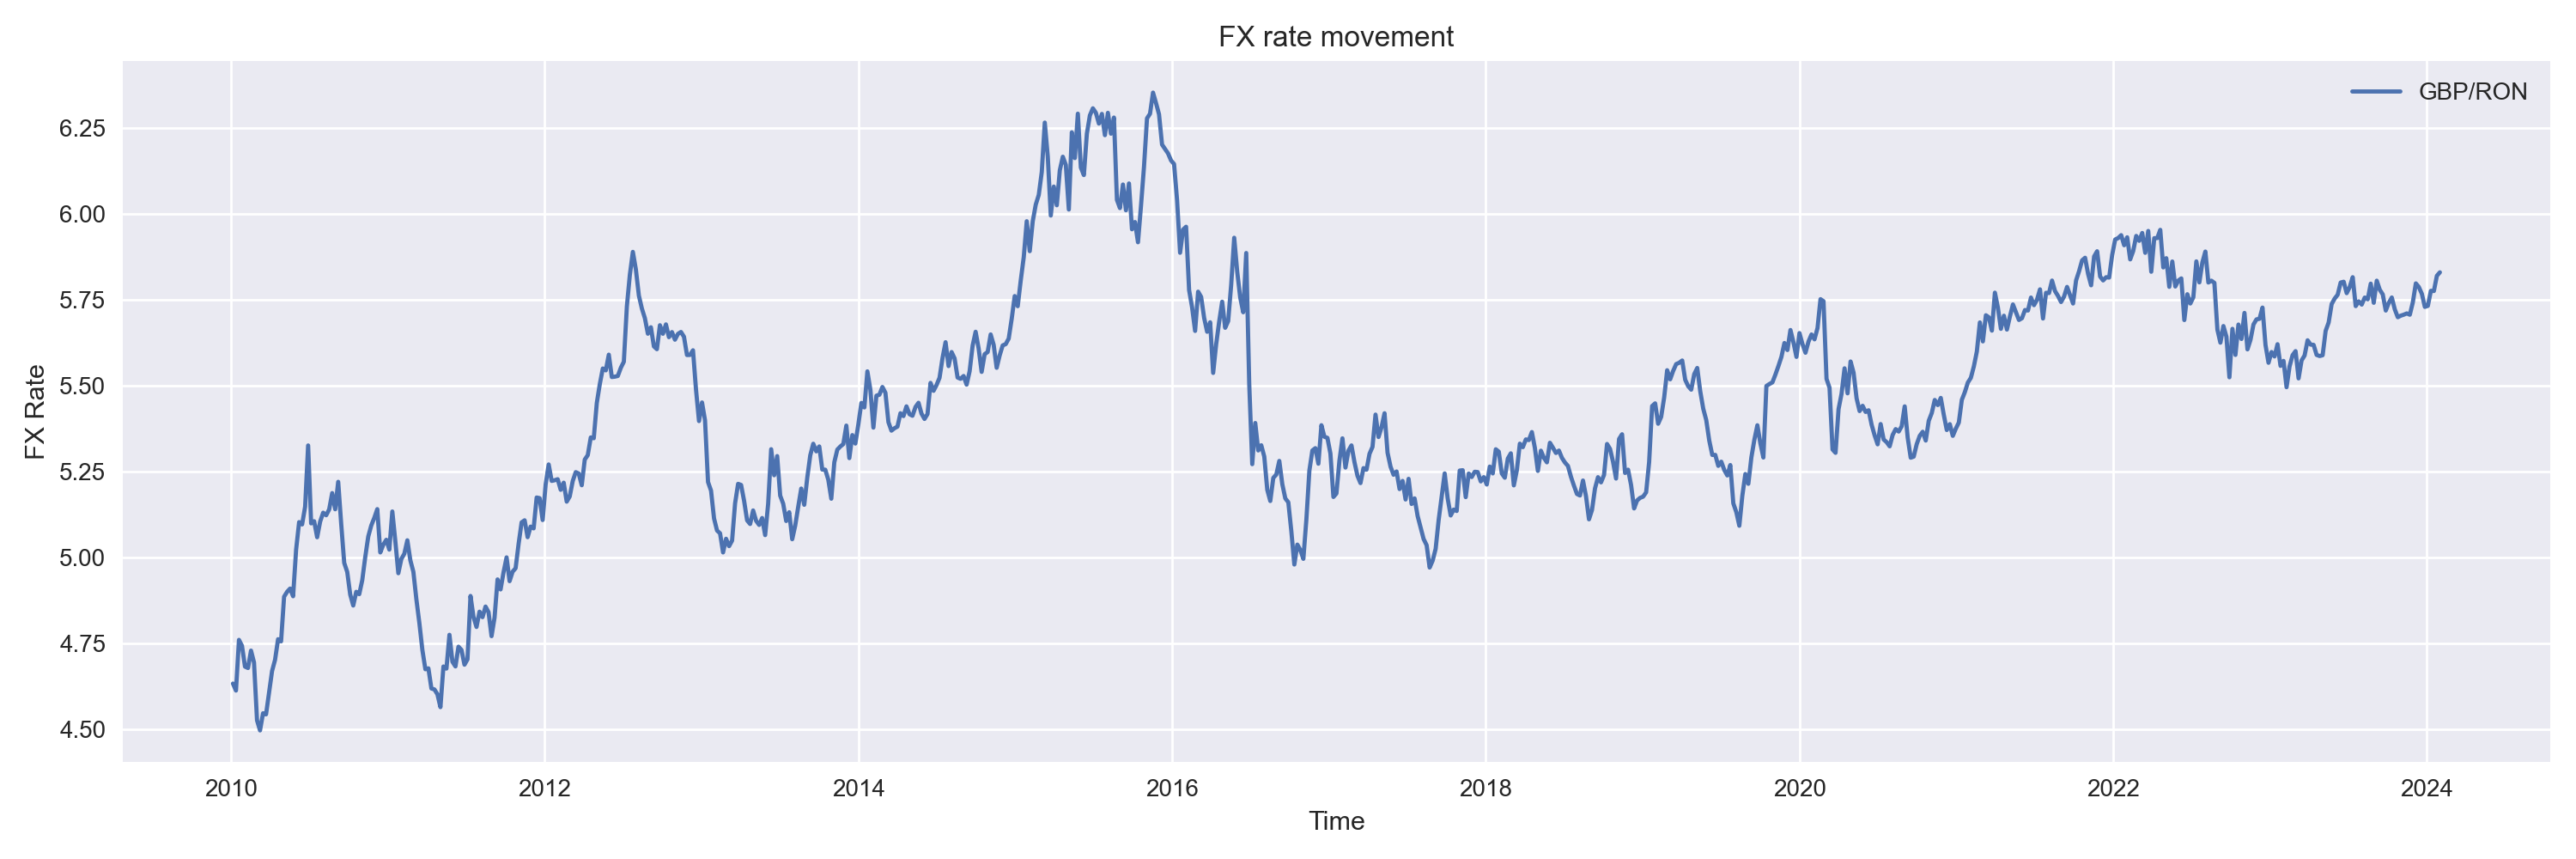

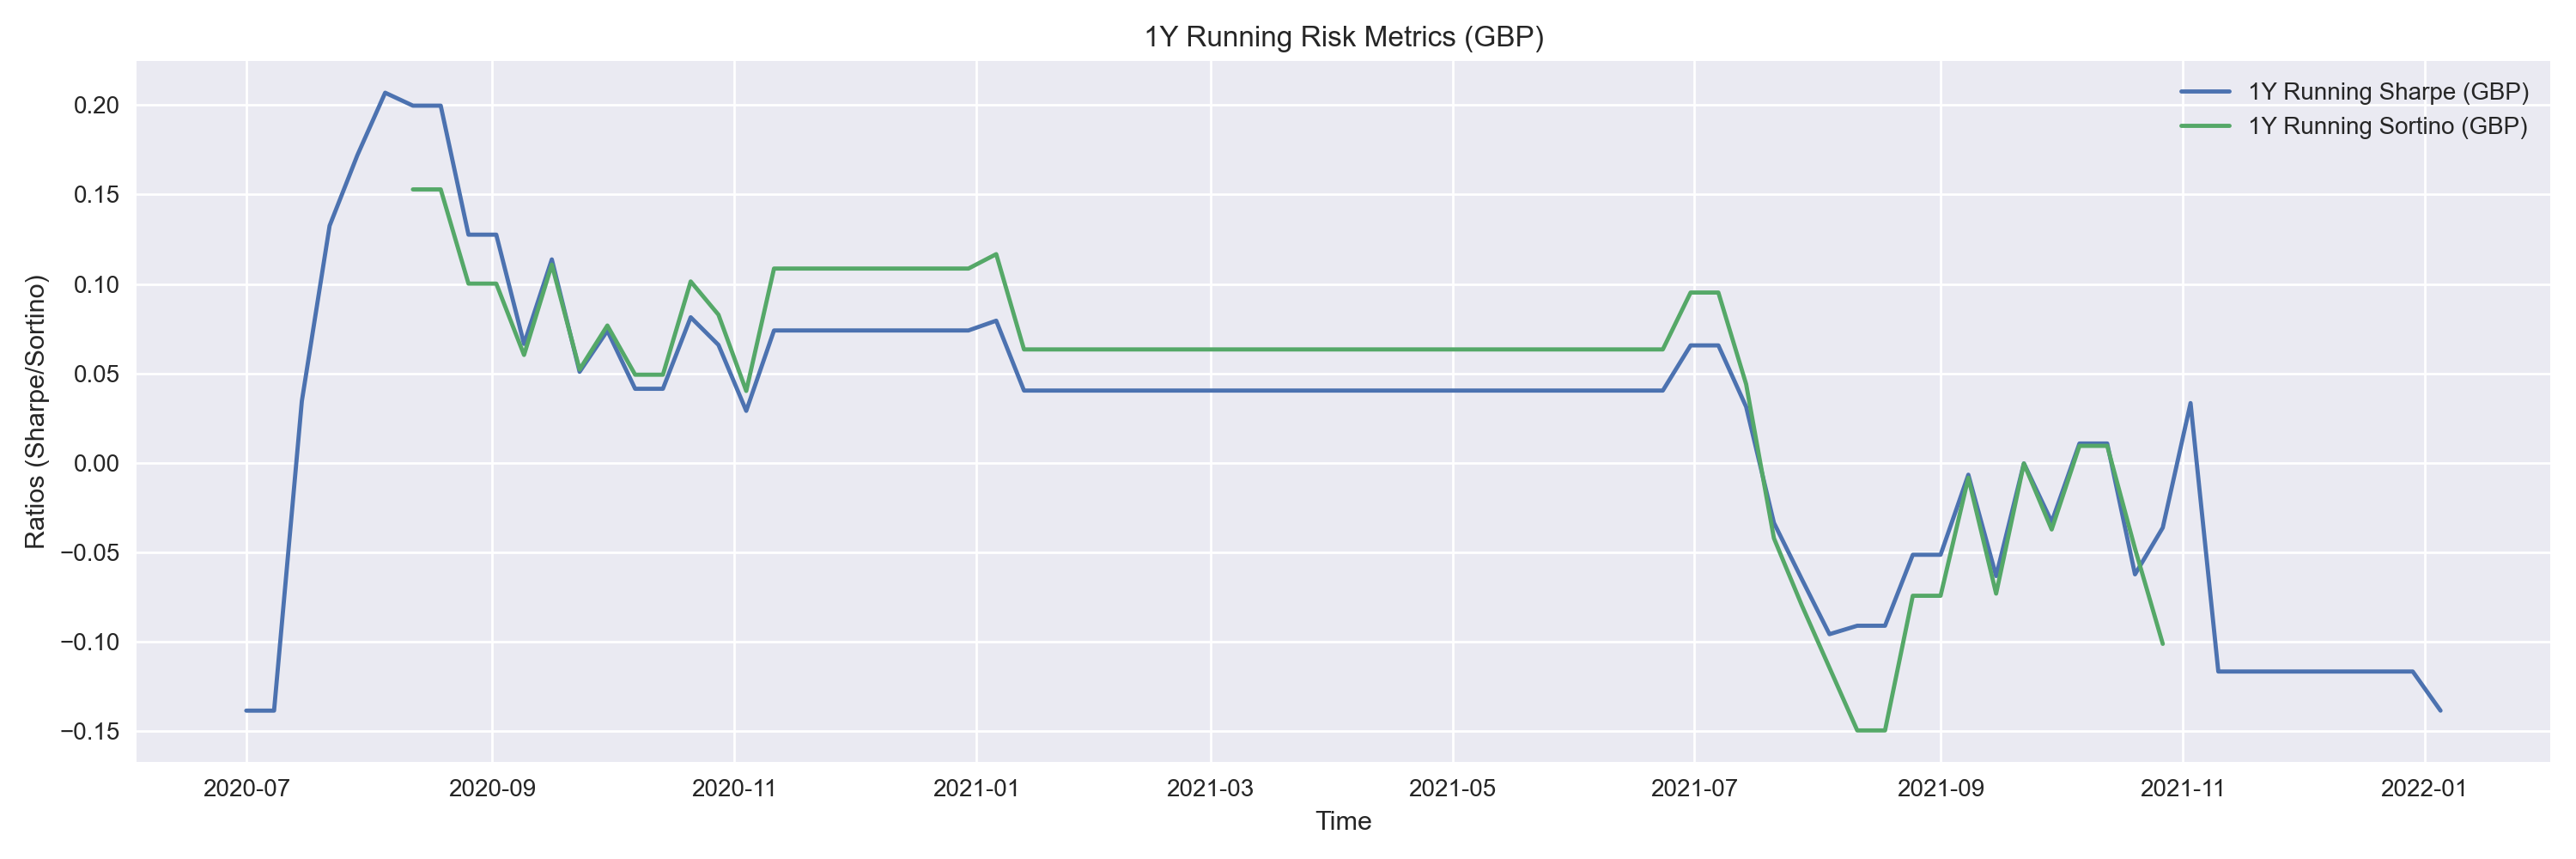

Correlation between Weekly Pnl and it's Components
         fx_pnl_gbp  Bond_Pnl_no_fx_change_gbp
Pnl_GBP    0.152014                   0.767107 




In [37]:
carry_RON = carry_trade('RON')

###    Analysis of the return metrics on GBP-RON:

    1. The overall Pnl is positive which can be confirmed from the high FX Pnl but we can see that the positions are taken only around 2020-21 because of the condition of the difference in the swap curves of the borrowing and lending currency should be greater than 50bp to hold a position.
    
    2. The majority of the time, the returns fluctuate around zero, which is typical for carry trade returns where interest rate differentials might determine the return and can be relatively stable.
    
    3. Return Distribution : We see a high value of distribution around 0, and have heavy tails symmetrical on the both sides and a sharp peak compared to normal distribution. It indicates that the returns have a higher likelihood of extreme values as compared to normal  distribution which can be risky. High kurtosis explains this. 

    4. Cummulative Pnl : PNL is highly sensitive to the Bond Pnl and high positive correlated for the whole period when returns are recorded. FX returns are major contributor towards increasing the Pnl for initial part and then the Bond Pnl increased the cumulative Pnl. The sharp movements in PnL components around 2020 are likely linked to the significant fluctuations in the GBP/RON exchange rate. The increase in the FX PnL followed by a sharp decrease could be associated with the GBP appreciating and then depreciating against the RON. The interest component’s decline suggests a change in the cost of borrowing or the yield on interest-bearing assets.

    5. FX Rate Movement: The GBP/RON rate trends upward until 2020, indicating a strengthening of the GBP against the RON or a weakening of the RON against the GBP. After 2020, the rate seems to stabilize and then fluctuates mildly, suggesting less volatility in the exchange rate post-2020.

    6. Yearly running risk metric: Key Observations: Relative Stability Before Late 2021: Both ratios show some stability with minor fluctuations before a noticeable decline in late 2021. This indicates that the investment was performing relatively in line with the risk-free rate when considering both total and downside risk. The sharp decrease in the Sharpe ratio in late 2021 suggests a period of underperformance or increased volatility, which negatively impacted the risk-adjusted returns. Following the decline, both ratios show some recovery and subsequent fluctuations. This could indicate a period of instability in the investment's performance or changing market conditions that are impacting the investment's risk and return profile. Both ratios end with a downward trend, suggesting that the investment's performance may have been suffering or that the risk was increasing without a corresponding increase in returns.
    
    7. Market risk factors: In this case, the change in FX rates actually increases the cumulative pnl significantly.



In [38]:
carry_RON

,full_bond_price,1w_bond_price,own_cap_gbp,borrowed_cap_gbp,tot_cap_gbp,borrow_5y,lend_5y,fx,local_currency_gbp,bond_bought,...,borrow_interest_gbp,Pnl_GBP,Return_GBP,Return_cum_GBP,running_sharpe_GBP,running_sortino_GBP,fx_held_const,GBP_recv_no_fx_change,Bond_Pnl_no_fx_change_gbp,fx_pnl_gbp
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-06,1.166851,0.000000,1250084.0,5000336.0,6250420.0,2.959169,0.059474,4.632420,28954570.0,0.0,...,0.0,0.0,0.0,0.000000,NaN,NaN,0.000000,NaN,0.0,0.0
2010-01-13,1.165689,1.173625,1228424.0,4913696.0,6142120.0,2.848057,0.057897,4.612022,28327590.0,0.0,...,-0.0,0.0,0.0,0.000000,NaN,NaN,4.632420,0.0,0.0,0.0
2010-01-20,1.163645,1.171703,1228678.0,4914712.0,6143390.0,2.883534,0.056293,4.759655,29240420.0,0.0,...,-0.0,0.0,0.0,0.000000,NaN,NaN,4.612022,0.0,0.0,0.0
2010-01-27,1.165666,1.159593,1234786.0,4939144.0,6173930.0,2.720618,0.057702,4.742326,29278790.0,0.0,...,-0.0,0.0,0.0,0.000000,NaN,NaN,4.759655,0.0,0.0,0.0
2010-02-03,1.165654,1.165597,1254966.0,5019864.0,6274830.0,2.722743,0.057829,4.681736,29377100.0,0.0,...,-0.0,0.0,0.0,0.000000,NaN,NaN,4.742326,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-03,1.009330,1.002781,1583242.0,6332968.0,7916210.0,3.354499,0.059612,5.732668,45381000.0,0.0,...,-0.0,0.0,0.0,0.061092,NaN,NaN,5.729651,0.0,0.0,0.0
2024-01-10,1.013991,1.011058,1574846.0,6299384.0,7874230.0,3.581428,0.060552,5.776438,45485000.0,0.0,...,-0.0,0.0,0.0,0.061092,NaN,NaN,5.732668,0.0,0.0,0.0
2024-01-17,1.016869,1.017262,1586210.0,6344840.0,7931050.0,3.722303,0.060717,5.775906,45809000.0,0.0,...,-0.0,0.0,0.0,0.061092,NaN,NaN,5.776438,0.0,0.0,0.0


# 5. Correlation between various pairs to each other:

In [39]:
pnl_data = pd.DataFrame({
    'pnl_RON': carry_RON['Pnl_GBP'],
    'pnl_EGP': carry_EGP['Pnl_GBP'],
    'pnl_HUF': carry_HUF['Pnl_GBP'],
    'pnl_CRC': carry_CRC['Pnl_GBP']
})

correlation_matrix = pnl_data.corr()

print(correlation_matrix)

          pnl_RON   pnl_EGP   pnl_HUF   pnl_CRC
pnl_RON  1.000000  0.205969  0.599625 -0.027625
pnl_EGP  0.205969  1.000000  0.234484  0.208237
pnl_HUF  0.599625  0.234484  1.000000 -0.004707
pnl_CRC -0.027625  0.208237 -0.004707  1.000000


##### The correlation matrix between pnl for all the currency pairs has been calculated. From the correlation matrix it can be seen that the GBP-HUF and GBP-RON are highly correlated and it is quite evident from the fact that both are European countries and have fairly same regulations for these markets.

# 6. Conclusion:

    1. Distribution of Returns generally have more values to the right than left, fatter left tails and excess kurtosis.
    2. FX rates is one of the dominant factor in the overall PNL, especially given than the currencies we are lending in are Emerging Market there is greater FX risk.
    3. The Lending Bond PNL generally is significant, until FX move against GBP is noted. Sudden movements in FX also impact the Bond PNL significantly.
    4. PnL for currency pair in same markets have huge correlation because of the obvious reasons. 